# MILESTONE 1

huggingface URL = https://huggingface.co/spaces/jovancast/Churn_Prediction

koyeb URL = https://churn-jovancast.koyeb.app/

## i. Introduction

Nama : Jovanca Stevani Tanjung

Batch 002 HCK

---

Objectives:
- be able to understand Artificial Neural Network concept
- be able to do data preparation to be used in Artificial Neural Network model
- be able to implement Artificial Neural Network with the data given
- be able to do analysis and explain the layers that's been made

## ii. Import Libraries

In [167]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from imblearn.pipeline import Pipeline as imbpipe
from imblearn.over_sampling import SMOTENC
from scipy import stats

import pickle
import warnings
warnings.filterwarnings('ignore')

np.random.seed(24)
tf.random.set_seed(24)

## iii. Data Loading

In [169]:
df = pd.read_csv("customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [170]:
#Showing the first 5 data from the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [171]:
#Showing the last 5 data from the dataset
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [172]:
#Checking the columns information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [173]:
#Converting TotalCharges into float
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors = 'coerce')

Changing the 'TotalCharges' column to float because it is detected as object type while the value of the column is float. And also to make it easier to analyze.

In [174]:
#Checking the dataset shape
df.shape

(7043, 21)

It can be seen that the data has 7043 rows and 21 columns.

In [175]:
#Checking the central tendency from the datset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


### Data Cleaning

In [176]:
missing_values = {}

for x in list(df.columns):
    missing_values[x] = 0
    for y in df[x]:
        if y in ['N/A', '--', '-', 'Null', '?', ' ']: # These are the specific NaN values we will be sweeping for.
            missing_values[x] = missing_values[x] + 1

missing_values

{'customerID': 0,
 'gender': 0,
 'SeniorCitizen': 0,
 'Partner': 0,
 'Dependents': 0,
 'tenure': 0,
 'PhoneService': 0,
 'MultipleLines': 0,
 'InternetService': 0,
 'OnlineSecurity': 0,
 'OnlineBackup': 0,
 'DeviceProtection': 0,
 'TechSupport': 0,
 'StreamingTV': 0,
 'StreamingMovies': 0,
 'Contract': 0,
 'PaperlessBilling': 0,
 'PaymentMethod': 0,
 'MonthlyCharges': 0,
 'TotalCharges': 0,
 'Churn': 0}

In [177]:
#mv = df[df['TotalCharges'] == ' ']
#df.drop(mv.index, inplace=True)

In [178]:
df.duplicated().any()

False

After checking if there is any duplicated data, seems like there is no duplicated rows. Means we can continue to do further analysis.

In [179]:
df.drop('customerID', axis=1, inplace=True)

Dropping 'customerID' because it's not going to be used in the analysis. because it has different value from each rows.

In [180]:
df['Churn'] = df['Churn'].replace({'No' : 0, 'Yes' : 1})
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Changing the value of the target column (Churn) to be binary value for better convenience.

## iv. Exploratory Data Analysis (EDA)

In [181]:
df_copy = df.copy()

In [182]:
for i in df_copy.columns.tolist():
    print(i, '\n')
    print(df[i].nunique())
    print('-'*30)

gender 

2
------------------------------
SeniorCitizen 

2
------------------------------
Partner 

2
------------------------------
Dependents 

2
------------------------------
tenure 

73
------------------------------
PhoneService 

2
------------------------------
MultipleLines 

3
------------------------------
InternetService 

3
------------------------------
OnlineSecurity 

3
------------------------------
OnlineBackup 

3
------------------------------
DeviceProtection 

3
------------------------------
TechSupport 

3
------------------------------
StreamingTV 

3
------------------------------
StreamingMovies 

3
------------------------------
Contract 

3
------------------------------
PaperlessBilling 

2
------------------------------
PaymentMethod 

4
------------------------------
MonthlyCharges 

1585
------------------------------
TotalCharges 

6530
------------------------------
Churn 

2
------------------------------


After checking the total unique value from each columns, we can tell which column is categorical and which column is numerical. In this case, I'll consider column that has more than 73 is numerical columns. Means there are 2 numerical columns.

In [183]:
df_copy.drop(['MonthlyCharges', 'TotalCharges', 'tenure'], axis=1, inplace=True)

In [184]:
df_copy.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [185]:
cat = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn']

In [1]:
df['Churn'].value_counts(kind='bar')

NameError: name 'df' is not defined

<Figure size 1000x500 with 0 Axes>

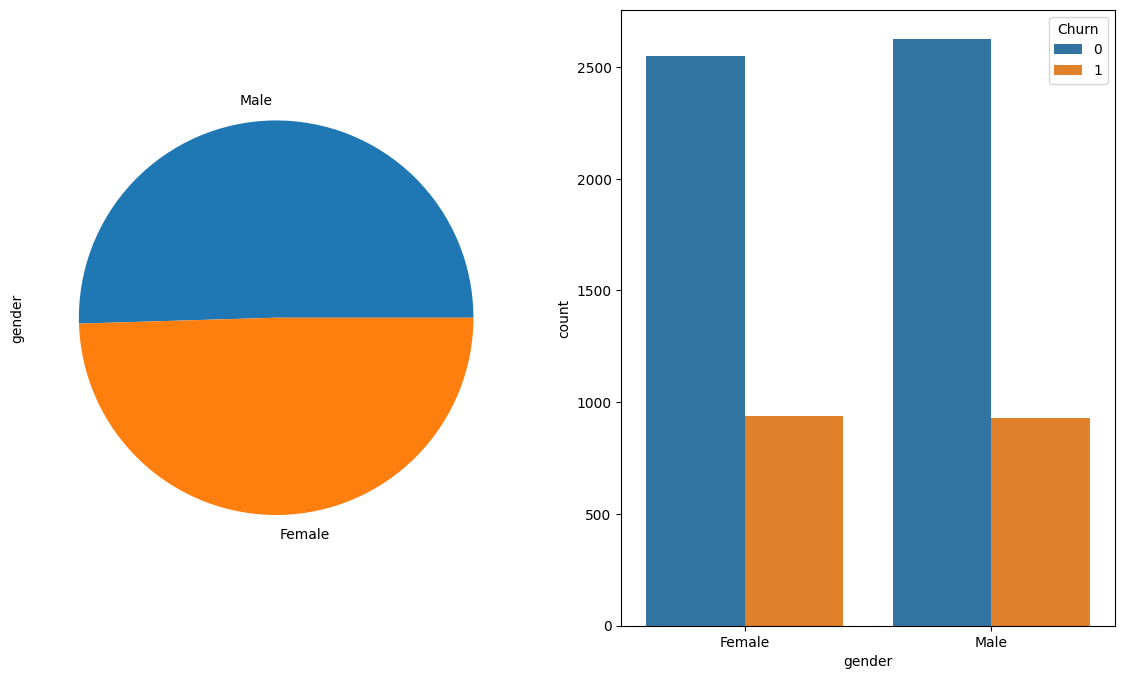

<Figure size 1000x500 with 0 Axes>

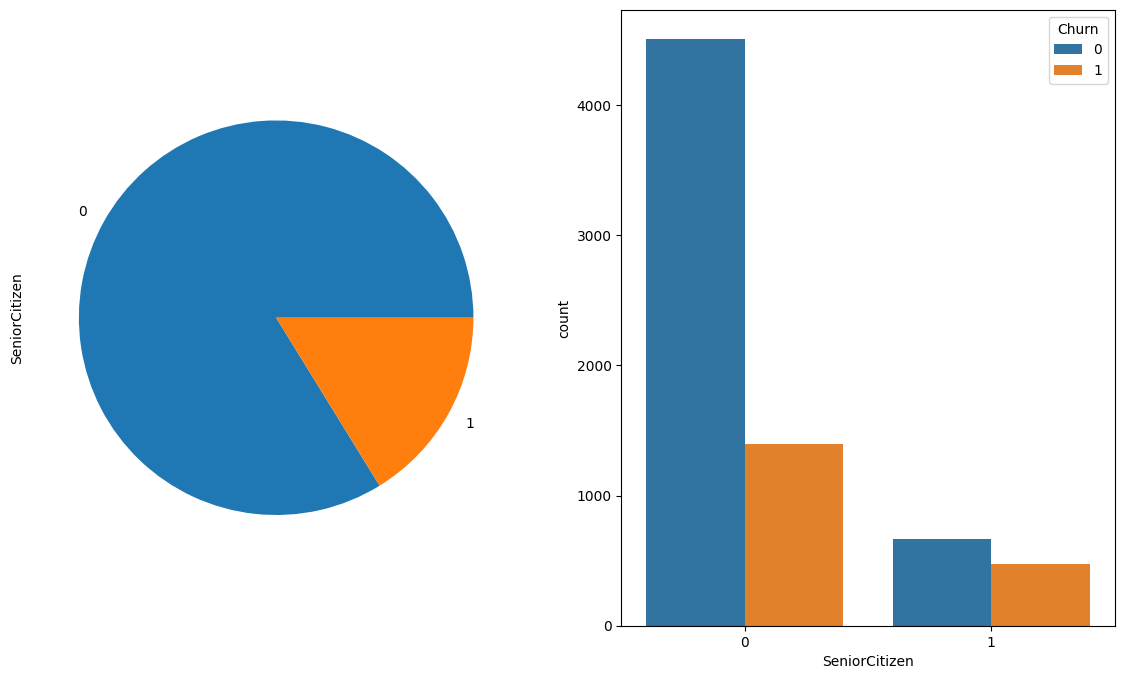

<Figure size 1000x500 with 0 Axes>

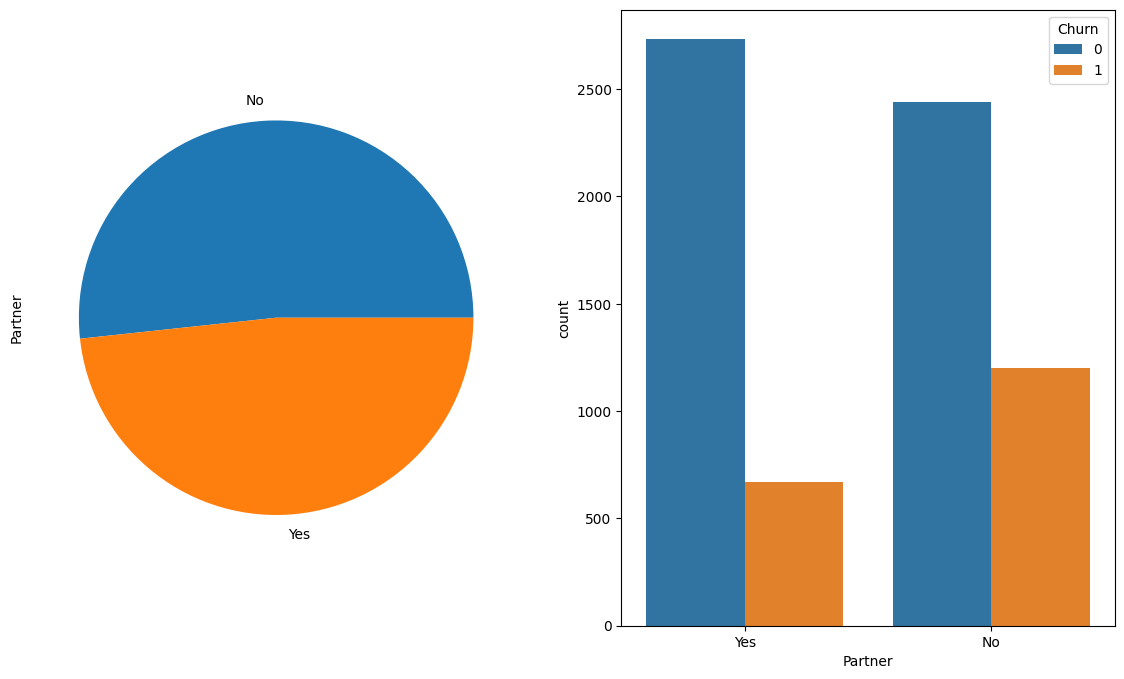

<Figure size 1000x500 with 0 Axes>

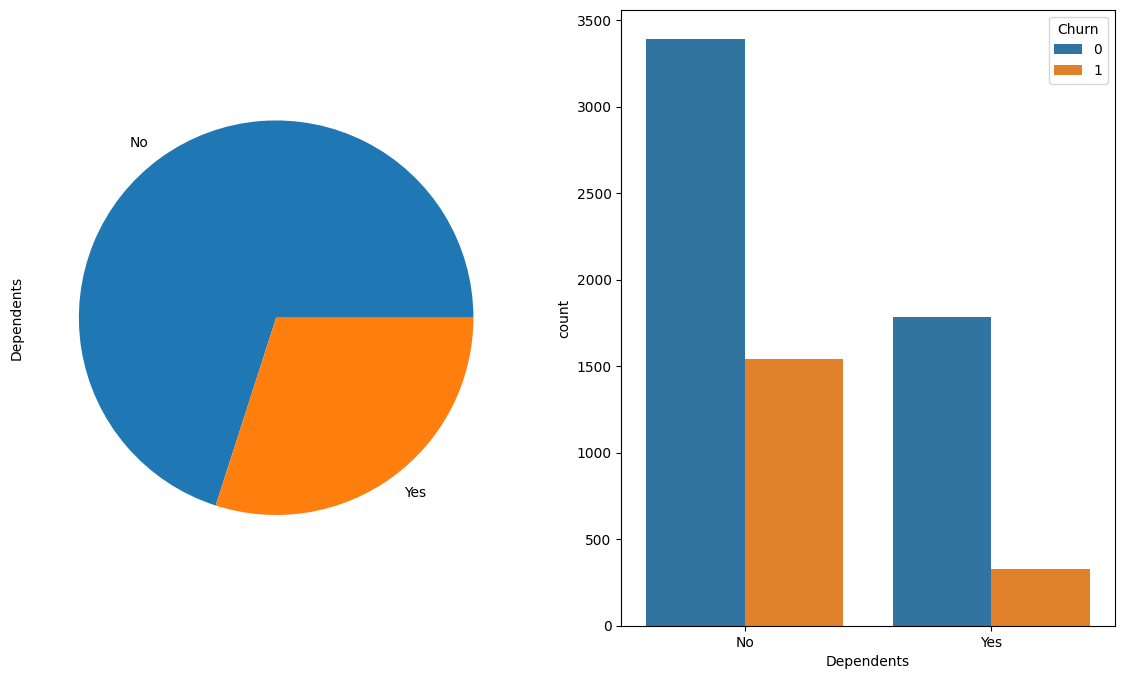

<Figure size 1000x500 with 0 Axes>

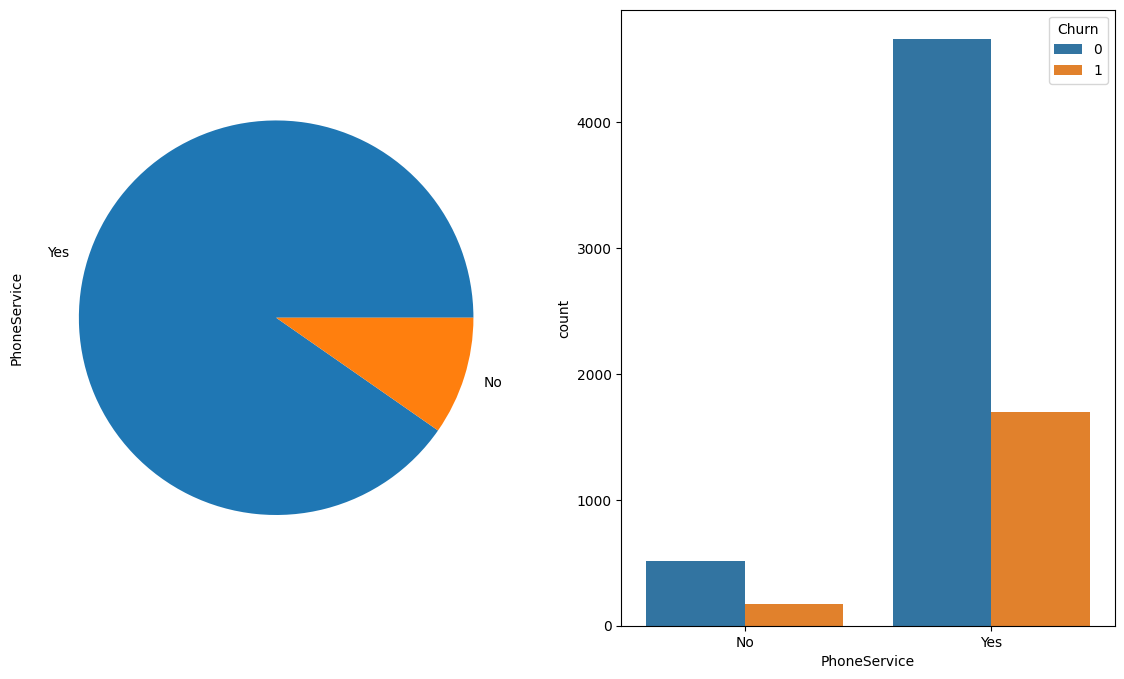

<Figure size 1000x500 with 0 Axes>

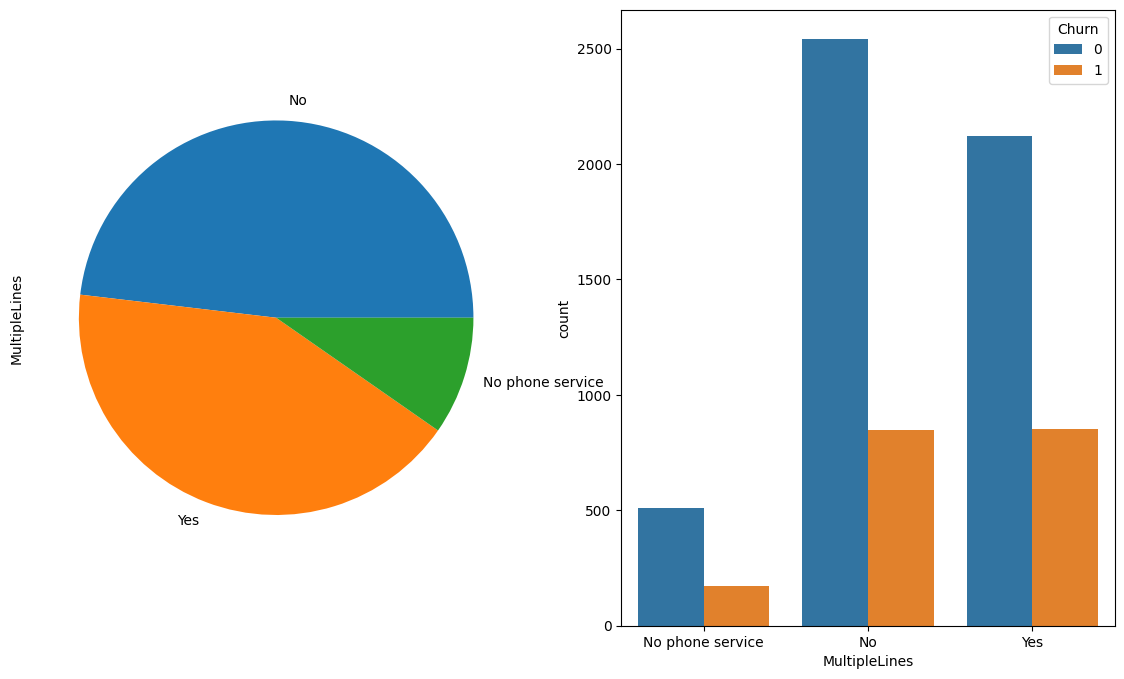

<Figure size 1000x500 with 0 Axes>

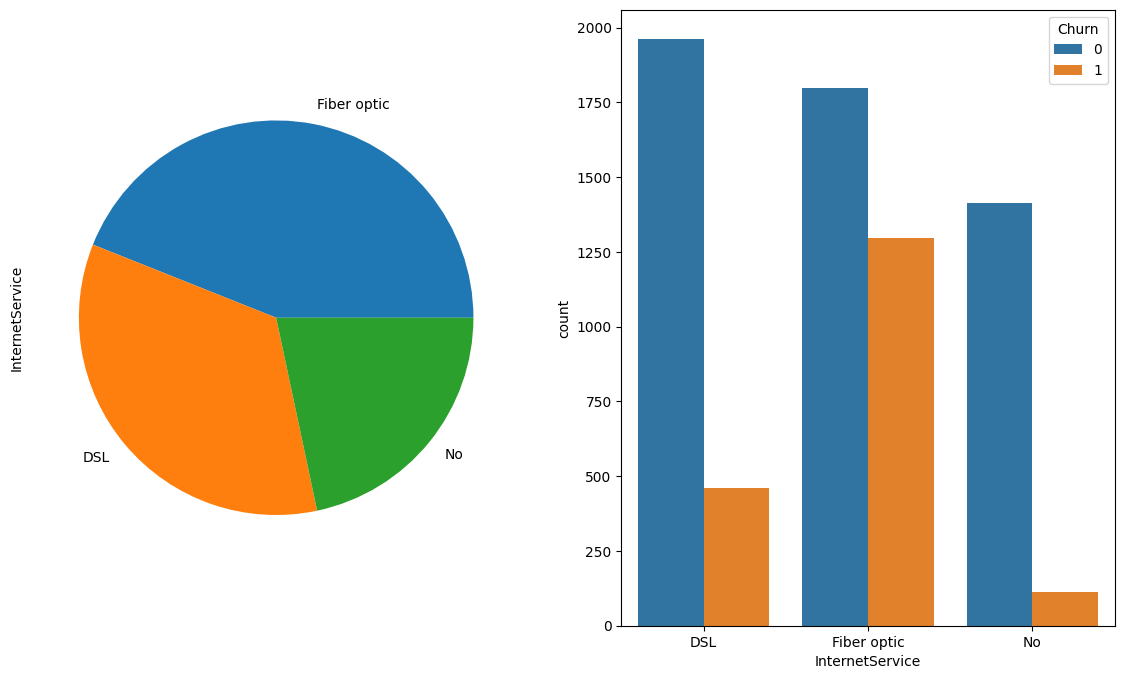

<Figure size 1000x500 with 0 Axes>

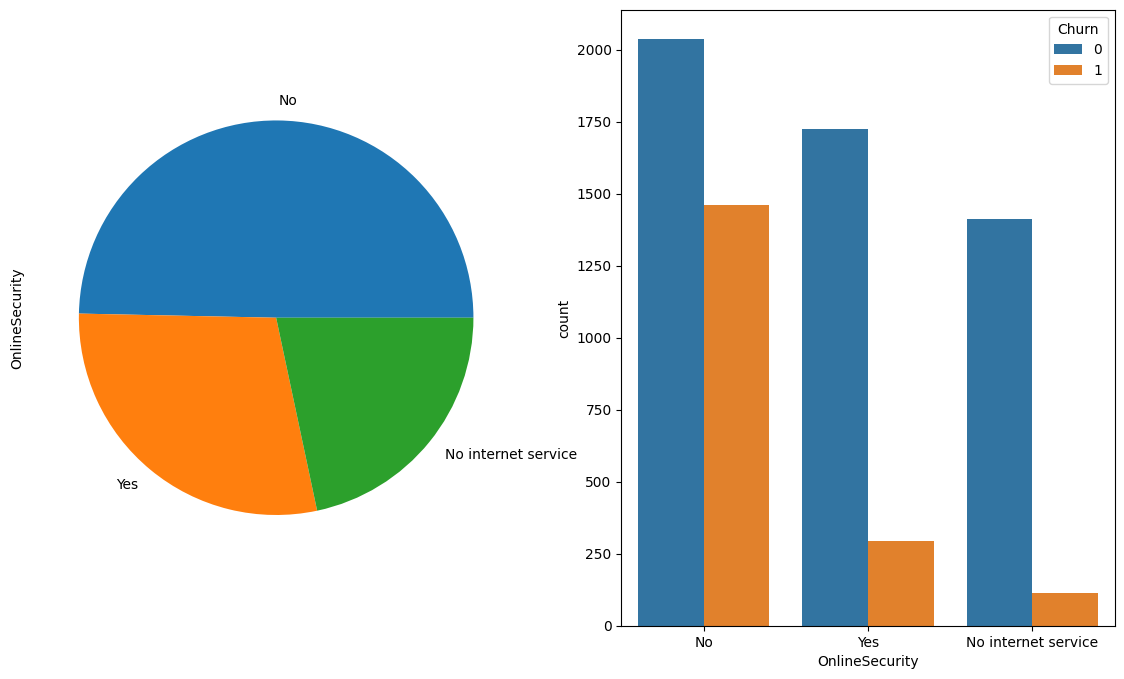

<Figure size 1000x500 with 0 Axes>

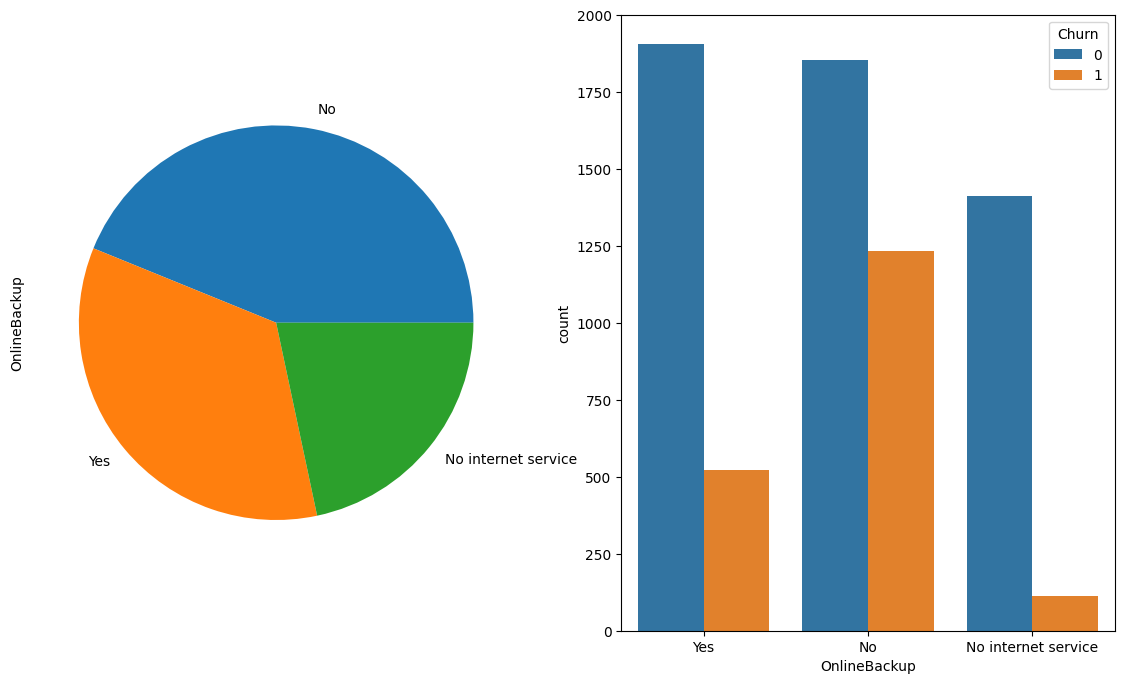

<Figure size 1000x500 with 0 Axes>

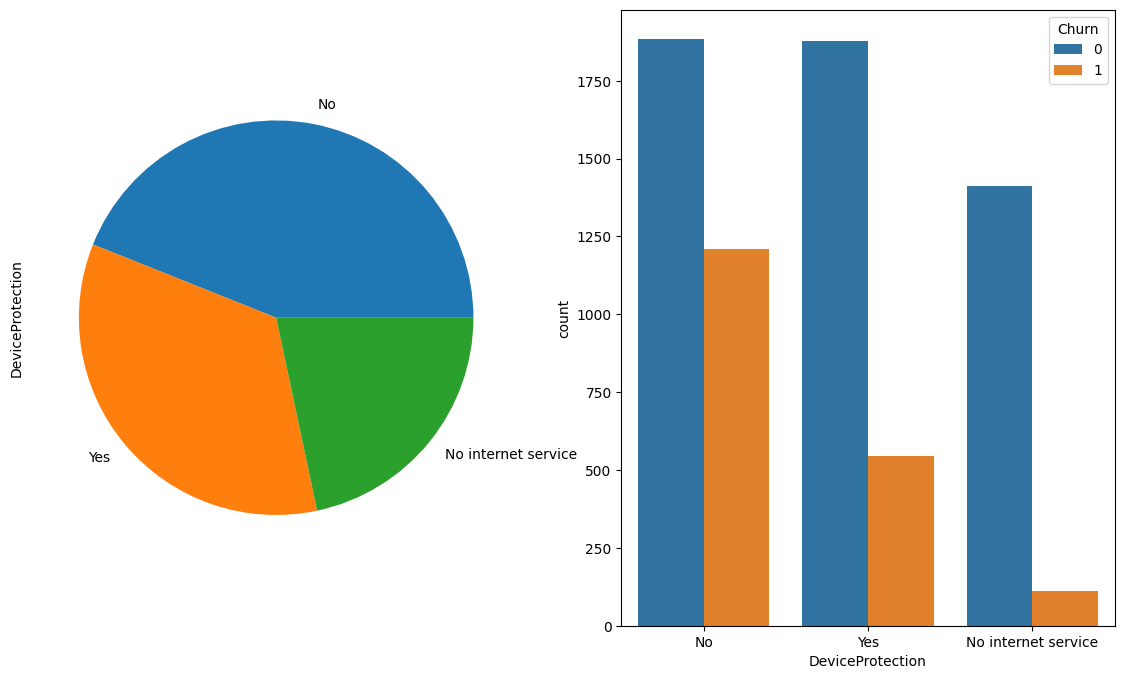

<Figure size 1000x500 with 0 Axes>

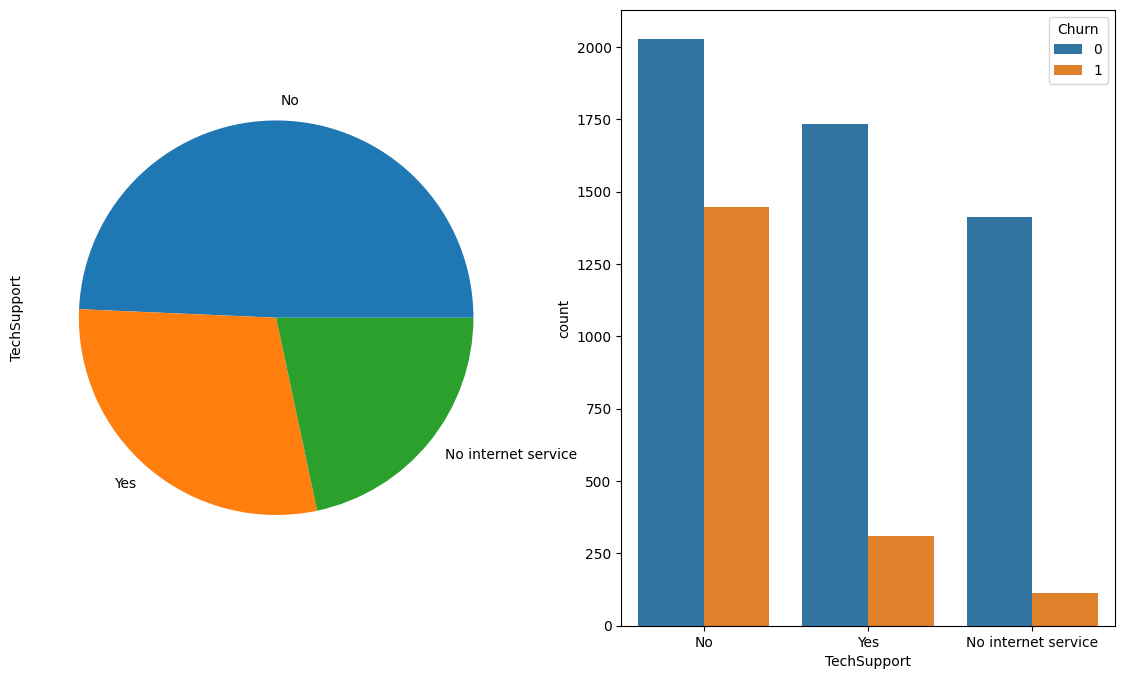

<Figure size 1000x500 with 0 Axes>

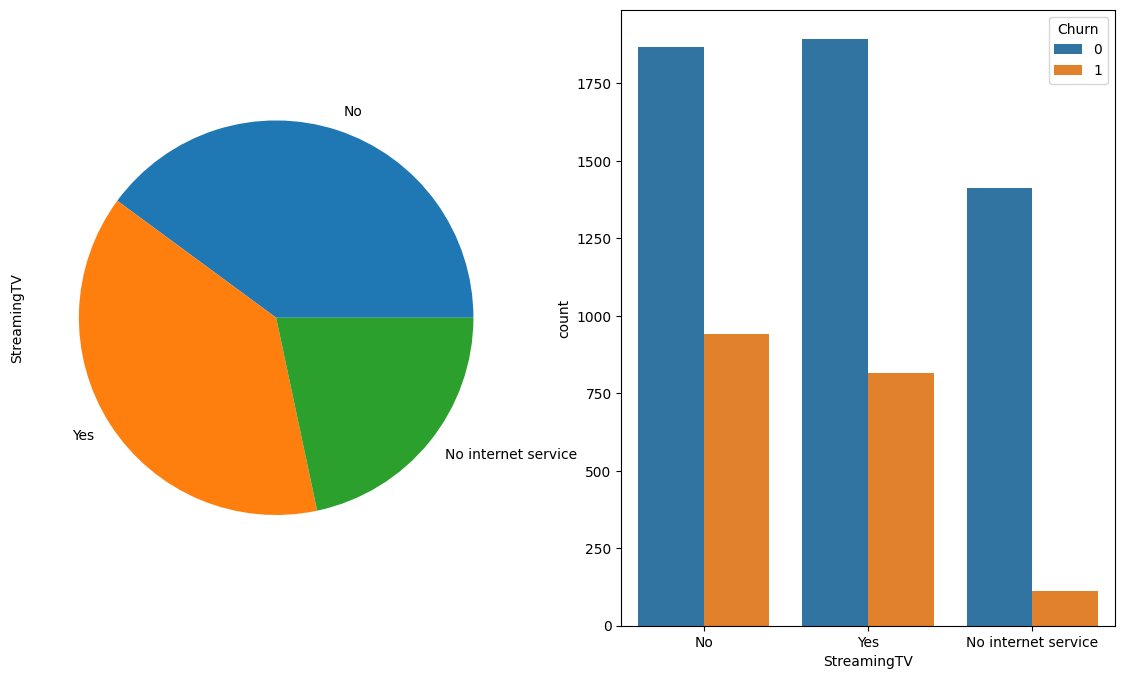

<Figure size 1000x500 with 0 Axes>

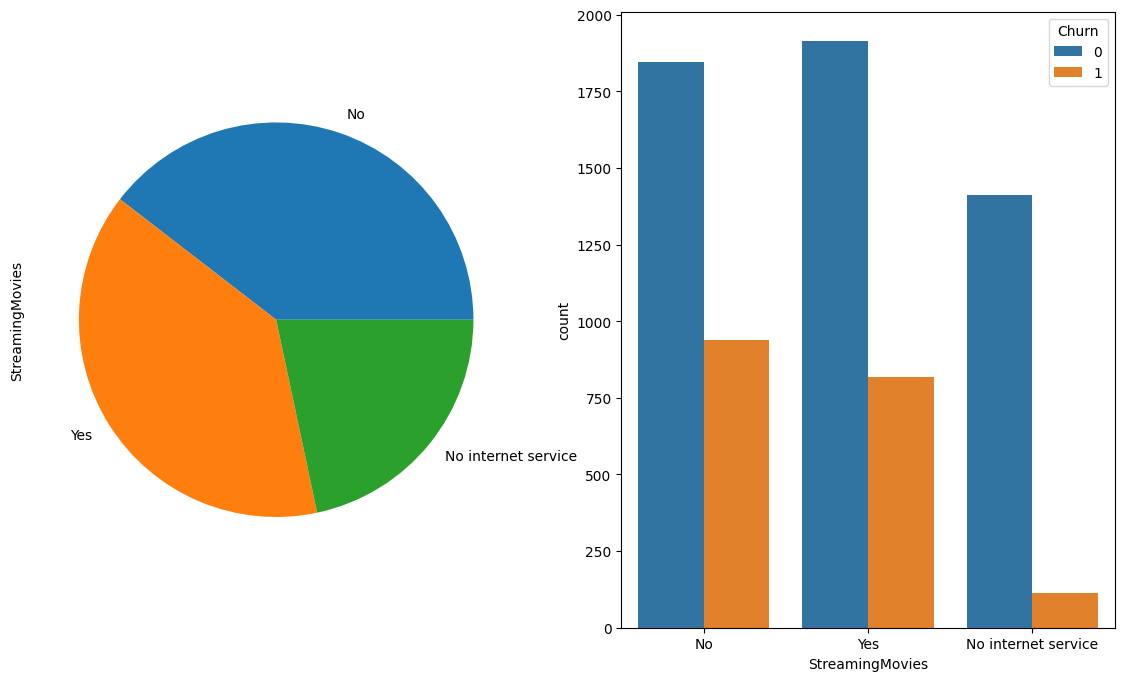

<Figure size 1000x500 with 0 Axes>

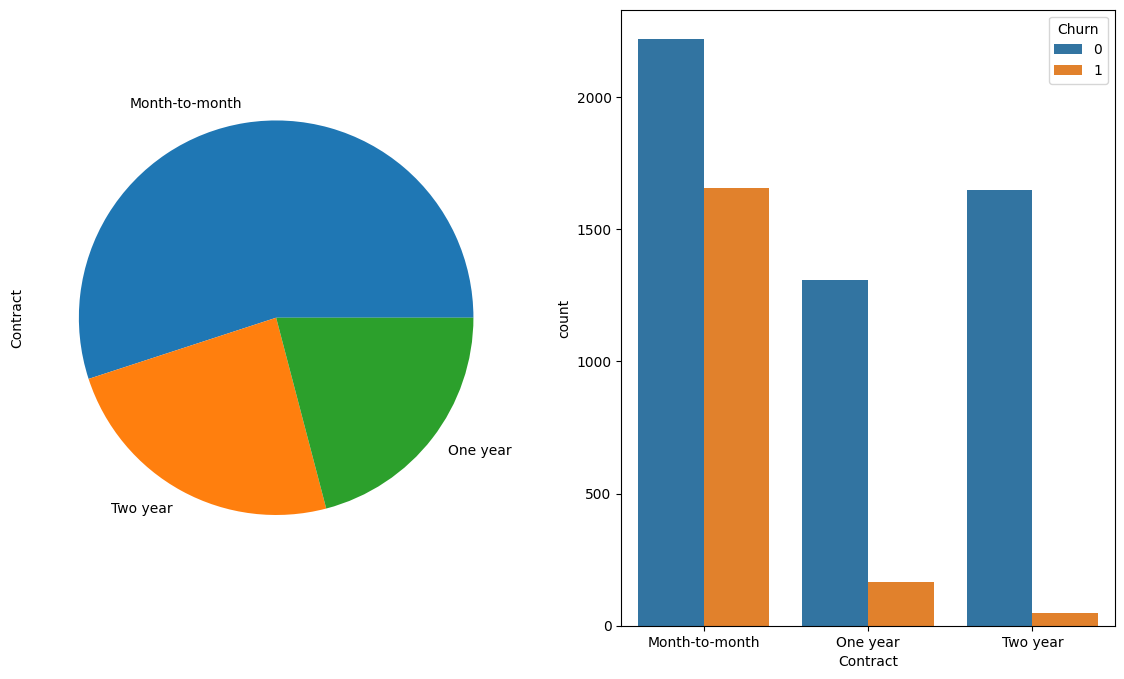

<Figure size 1000x500 with 0 Axes>

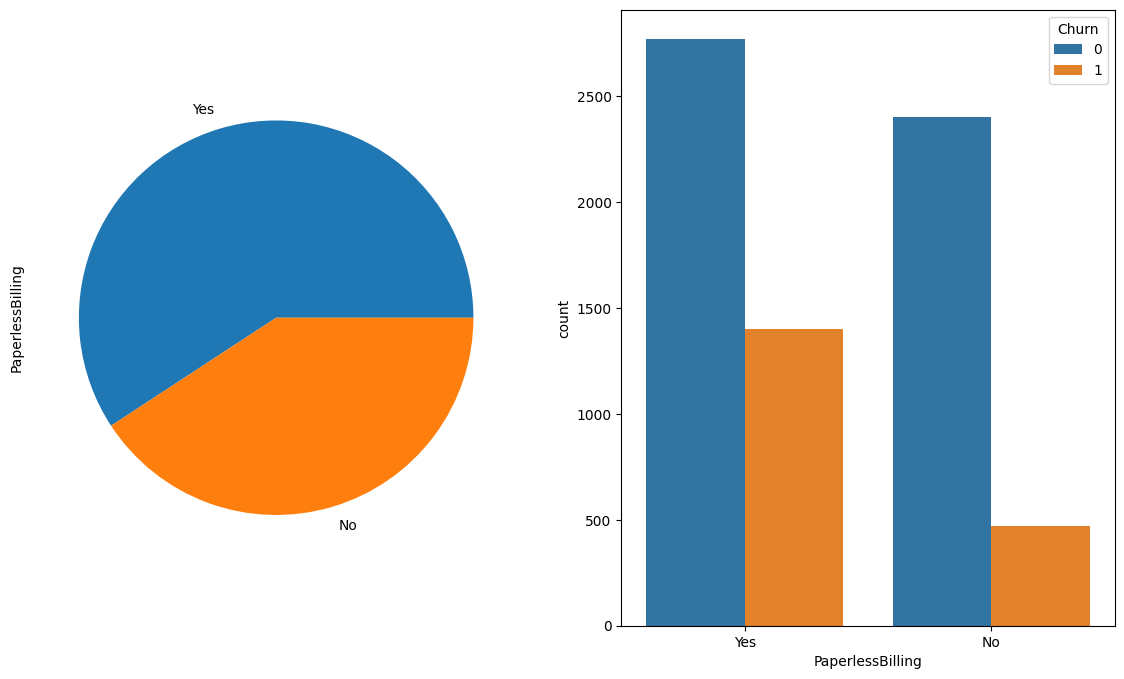

<Figure size 1000x500 with 0 Axes>

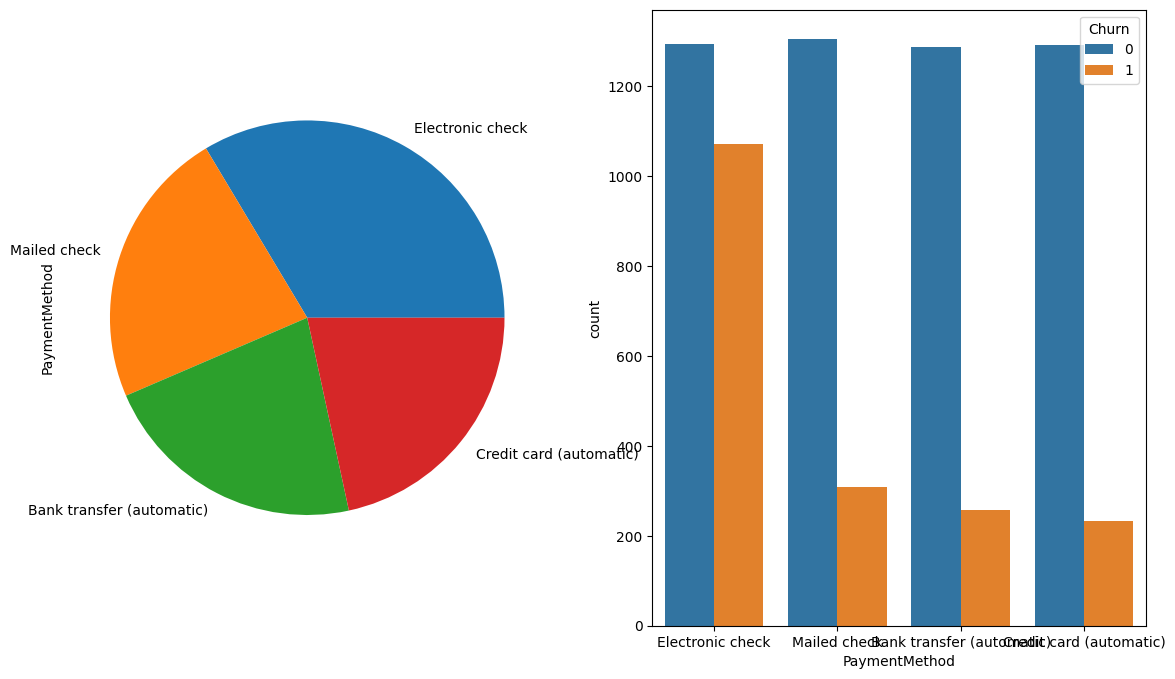

<Figure size 1000x500 with 0 Axes>

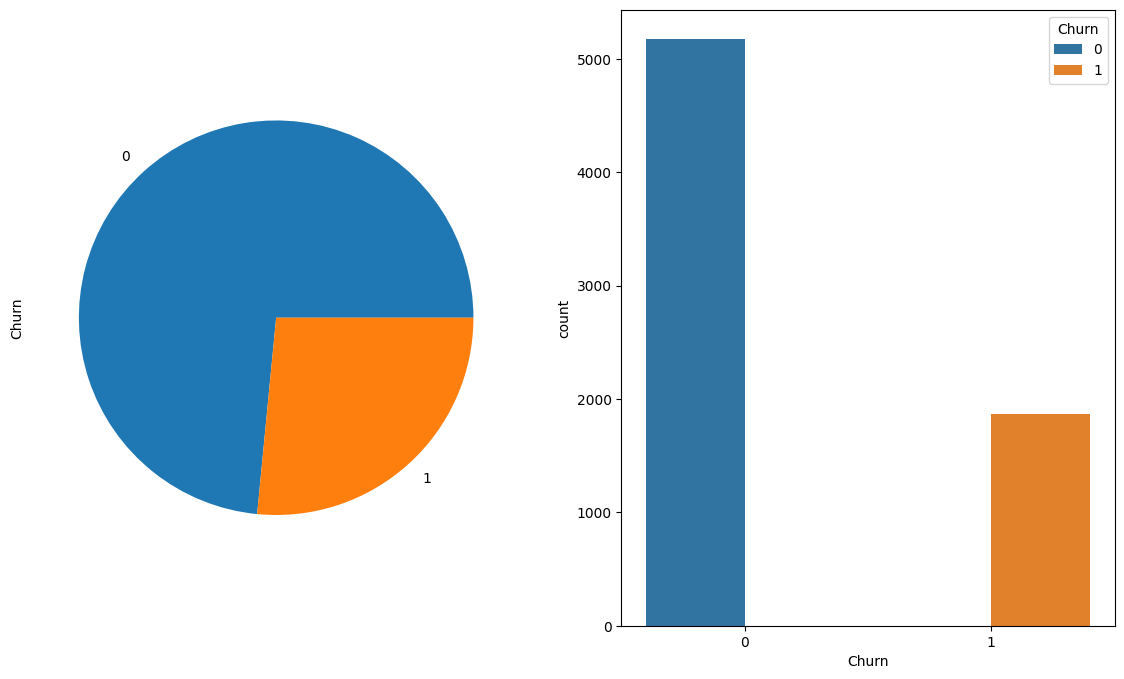

In [186]:
for col in cat:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(14,8))
  df_copy[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Churn', data = df_copy)

1. The total amount of female and male is just the same, and the proportion from each gender towards the Churn is also the same. which can be seen that there is no difference between male and female when it comes to Churn value.
2. The total of citizen that is not senior is more than the senior one. So it is understandable that the non-senior citizen has more proportion compared the the senior citizen. 
3. Customer that has partner is less than the customer that has no partner. And the customer that has no partner cost likely more 'Churn' then the one with partner.
4. Customer that has no dependents is more than the one with dependents. but from the proportion towrads Churn it's just the same which it doesn't affect that much on the Churn possibility.
5. The total amount of customer that has phone service is alot more compared the customer that has no PhoneService. So it is understandable if there is huge difference in the proportion towards Churn value.
6. Based on the customer's internet service used, it is seen that customer who use FIber Optic internet service has a big total of Churn compared to other internet service. And the most less Churn is the customer that has no internet service.
7. Customer that has no Online Security seems having Churn the most compared to others.
8. Customer with no Online Backup has Churn the most compared to others.
9. Based on the Device Protection, customer that has no Device Protection has Churn the most compared to others. Means Device Protection is important to prevent Churn.
10. Tech Support is also important to prevent Churn because it seems like customer that has no Tech Support has Churn the most, compared to others.
11. Customer that took contract month-to-month seems like having the highest total of Churn.
12. Based on Payment Method, customer that use Electronic Check has Churn the most compared to other method. It means that using other payment method is way more safer.

## v. Data Preprocessing

### Split Data

#### Features and Target Data Split

In [187]:
#Split data x for features and y for target
x = df.drop('Churn', axis=1)
y = df['Churn']

Splitting the data where x stands for features and y stands for target.

In [188]:
#Split train, test and val set from the dataset
x_train_full, x_test,  y_train_full, y_test = train_test_split(x,
                                                               y,
                                                               shuffle=True, test_size=0.2,
                                                               stratify= y
                                                               )

x_train, x_val, y_train, y_val = train_test_split(x_train_full,
                                                  y_train_full,
                                                  shuffle=True, test_size=0.2)

In [189]:
for i in [x_train, x_test, x_val, y_train, y_test, y_val ]:
    print(i.shape)

(4507, 19)
(1409, 19)
(1127, 19)
(4507,)
(1409,)
(1127,)


After splitting the data to be train, test and val set. Then displaying the shape from each set.

#### Splitting Numerical and Categorical Columns

In [190]:
num_col = [ 'MonthlyCharges','TotalCharges'] 
cat_col = ['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod'] 
target = ['Churn']

I Splitted the numerical and categorical columns to make it easier to analyze the data, because different type of columns have different way to handle.

In [191]:
df_train = pd.concat([x_train, y_train], axis=1)
df_train.shape

(4507, 20)

### **Categorical Features**

In [192]:
df_train[cat_col].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5086,Male,0,No,No,45,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check
2468,Male,0,Yes,No,4,No,No phone service,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check
4545,Female,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic)
2909,Female,0,No,No,43,Yes,No,DSL,No,Yes,No,Yes,No,No,One year,No,Electronic check
4425,Male,0,Yes,Yes,14,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Month-to-month,No,Mailed check


Checking what are the columns in the categorical columns.

In [193]:
for i in df_train[cat_col].columns.tolist():
    print(i, '\n')
    print(df_train[cat_col][i].value_counts())
    print('-'*30)

gender 

Male      2266
Female    2241
Name: gender, dtype: int64
------------------------------
SeniorCitizen 

0    3761
1     746
Name: SeniorCitizen, dtype: int64
------------------------------
Partner 

No     2333
Yes    2174
Name: Partner, dtype: int64
------------------------------
Dependents 

No     3151
Yes    1356
Name: Dependents, dtype: int64
------------------------------
tenure 

1     384
72    229
2     155
3     127
4     117
     ... 
36     37
21     35
44     30
28     28
0       7
Name: tenure, Length: 73, dtype: int64
------------------------------
PhoneService 

Yes    4070
No      437
Name: PhoneService, dtype: int64
------------------------------
MultipleLines 

No                  2151
Yes                 1919
No phone service     437
Name: MultipleLines, dtype: int64
------------------------------
InternetService 

Fiber optic    2004
DSL            1541
No              962
Name: InternetService, dtype: int64
------------------------------
OnlineSecurity 



Result above showing the value count from each categorical columns.

#### Ordinal Encoder

Columns that are going to be encoded using ordinal encoder are =
`['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract','PaperlessBilling']`

In [194]:
gen_cat = ['Female','Male']
par_cat = ['No','Yes']
dep_cat = ['No','Yes']
pho_cat = ['No','Yes']
mul_cat = ['No','Yes','No phone service']
ins_cat = ['No','Fiber optic','DSL']
ons_cat = ['No','Yes','No internet service']
onb_cat = ['No','Yes','No internet service']
dev_cat = ['No','Yes','No internet service']
tec_cat = ['No','Yes','No internet service']
stt_cat = ['No','Yes','No internet service']
stm_cat = ['No','Yes','No internet service']
con_cat = ['Month-to-month','One year','Two year']
pap_cat = ['No','Yes']


ord_enc = OrdinalEncoder(categories=[gen_cat,par_cat,dep_cat,pho_cat,mul_cat,ins_cat,ons_cat,onb_cat,dev_cat,tec_cat,stt_cat,stm_cat,con_cat,pap_cat])
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_train[['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling']]))
df_train.drop(columns=['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling'],axis=1,inplace=True)
cat_ord.columns = ['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling']
df_train = pd.concat([df_train.reset_index(drop=True), cat_ord], axis=1)

In [195]:
df_train.head()

,SeniorCitizen,tenure,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling
0,0,45,Electronic check,20.40,930.45,1,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
1,0,4,Electronic check,48.55,201.00,1,1.0,1.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2,0,1,Bank transfer (automatic),44.15,44.15,0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,43,Electronic check,55.45,2444.25,0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,14,Mailed check,69.20,944.65,0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


these are the columns after getting encoded by ordinal encoder

#### One Hot Encoding

Then, column that is going to be encoded using One Hot Encoder is 'PaymentMethod' column.

In [196]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(df_train[['PaymentMethod']]))
cat_ohe.columns = ohe_enc.get_feature_names(['PaymentMethod'])
df_train.drop(columns=['PaymentMethod'],axis=1,inplace=True)
df_train = pd.concat([df_train.reset_index(drop=True), cat_ohe], axis=1)

#### Heatmap for Categorical

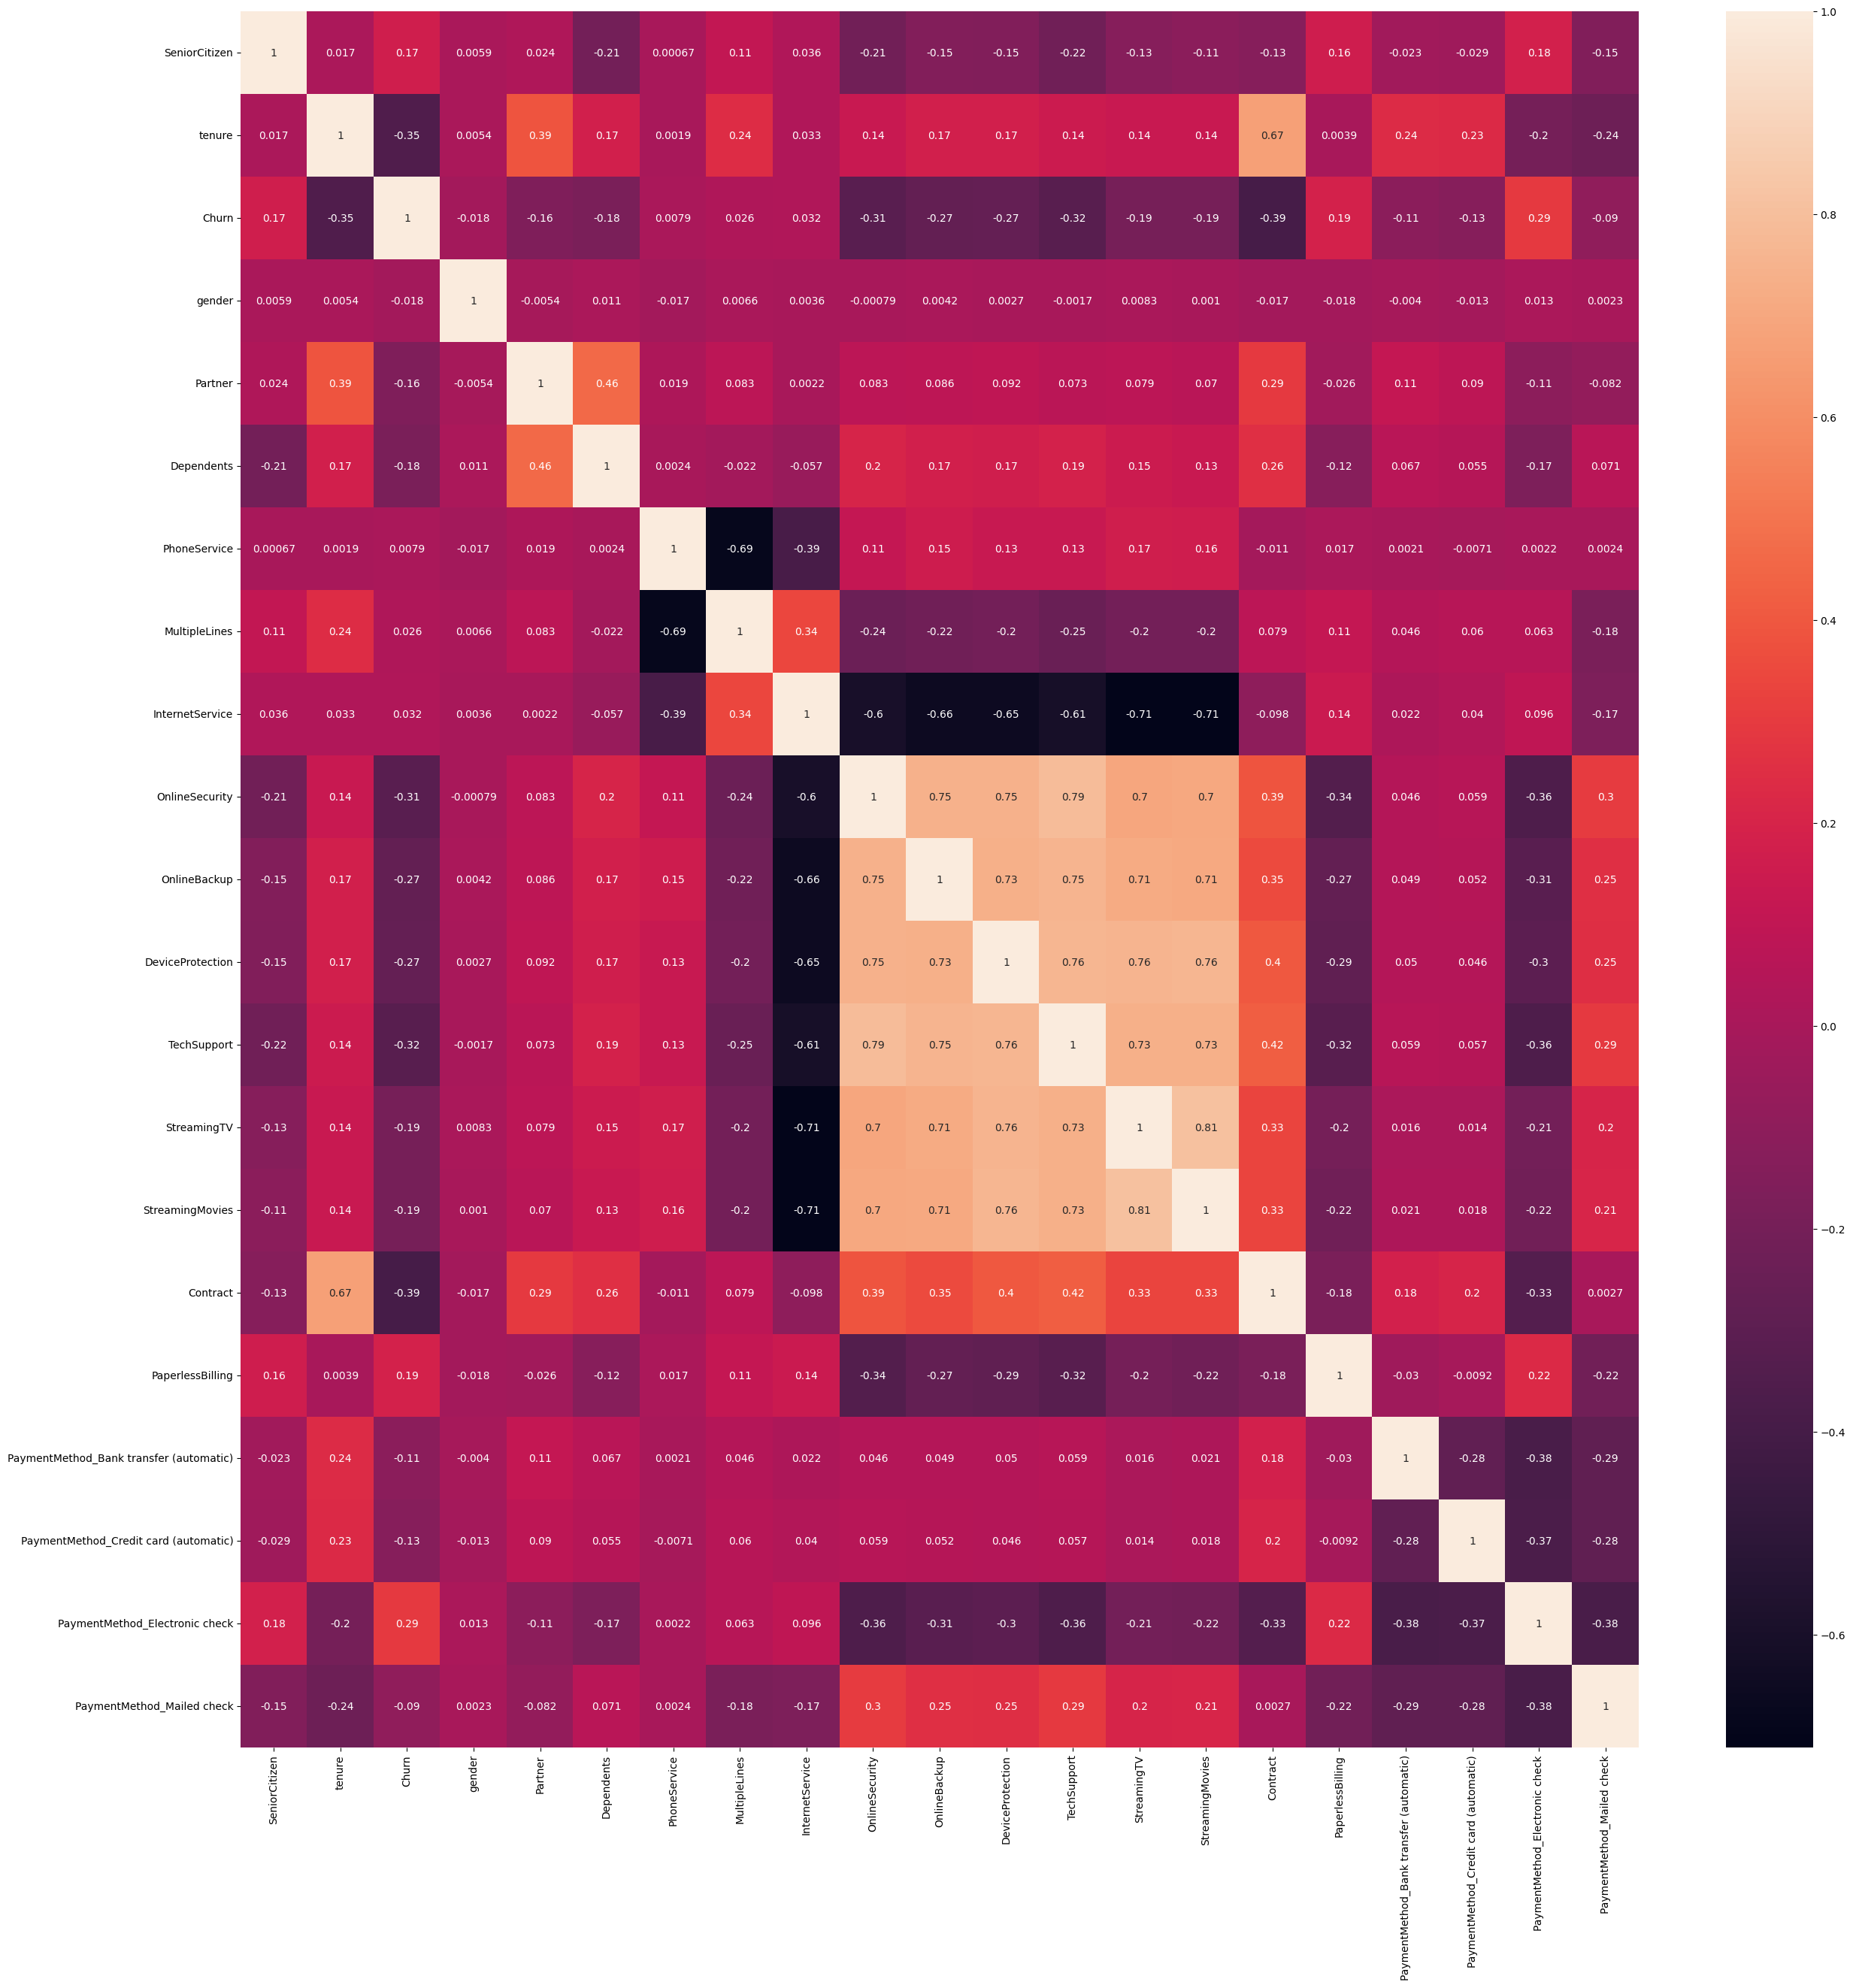

In [197]:
heat_cat = df_train.drop(columns=['MonthlyCharges', 'TotalCharges'])
plt.figure(figsize=(30,30))
sns.heatmap(heat_cat.corr(),annot=True)

### **Numerical Features**

In [198]:
df_train[num_col].head(3)

,MonthlyCharges,TotalCharges
0,20.40,930.45
1,48.55,201.00
2,44.15,44.15


Checking the columns from the train data numerical columns. Which shown there are 2 numerical columns. 'MonthlyCharges' and 'TotalCharges'

In [199]:
df_num = df_train[num_col]

put the numerical columns from train data to a variable to make it easier to analyze

#### Outlier Handling

In [200]:
def coba(a,c):
  skewness = a[c].skew()
  print('The Skewness of',c,':',skewness)

for x in df_train[num_col]:
    coba(df_train,x)

The Skewness of MonthlyCharges : -0.23859780066832897
The Skewness of TotalCharges : 0.9258539131734308


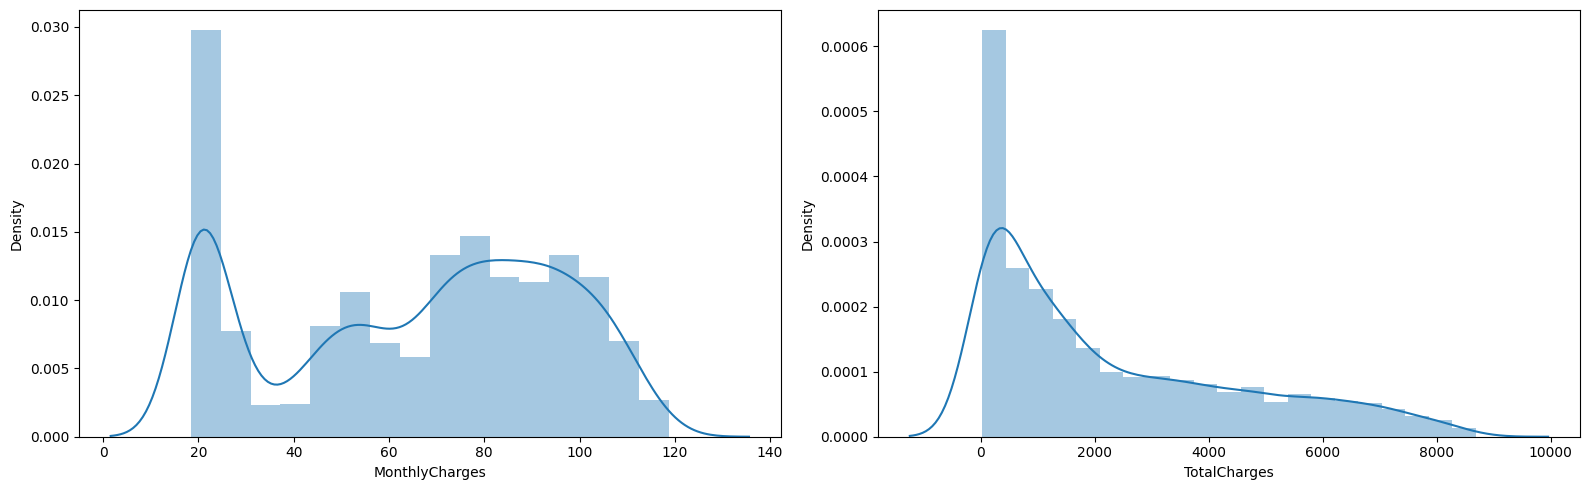

In [201]:
fig, ax = plt.subplots(ncols=2, figsize=(16,5))
ax = ax.flatten()
for i, col in enumerate(num_col):
    sns.distplot(df_train[col], ax=ax[i])
plt.tight_layout()

It can be seen from the result above that `MonthlyCharges` column has normal distribution. While `TotalCharges` is right skewed.

MonthlyCharges Skewness: -0.23859780066832897


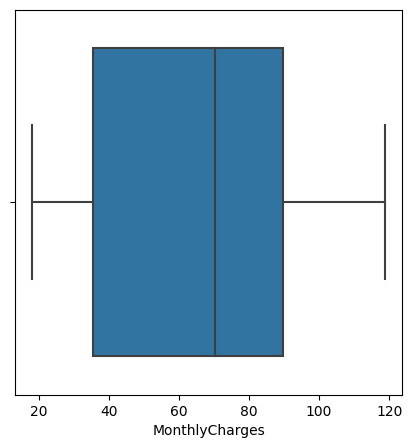

In [202]:
print(df_num['MonthlyCharges'].name + ' Skewness: ' + str(df_num['MonthlyCharges'].skew()))
fig, ax = plt.subplots(figsize = (5, 5))
sns.boxplot(df['MonthlyCharges'], ax = ax)

TotalCharges Skewness: 0.9258539131734308


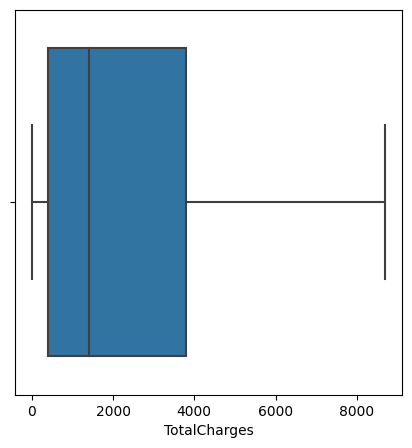

In [203]:
print(df_num['TotalCharges'].name + ' Skewness: ' + str(df_num['TotalCharges'].skew()))
fig, ax = plt.subplots(figsize = (5, 5))
sns.boxplot(df['TotalCharges'], ax = ax)

In [204]:
df_num.isnull().sum()

MonthlyCharges    0
TotalCharges      7
dtype: int64

after checking, there are 7 missing value from `TotalCharges` column. which I'm going to drop.

In [205]:
df_num.dropna(axis=0, inplace=True)

In [206]:
wins = Winsorizer(capping_method = 'iqr', tail='both', fold=3, variables = ['TotalCharges'])
df_num = wins.fit_transform(df_num)

After cleaning the missing value from the data, then capping the `TotalCharges` column because the column is right skewed.

#### Scaling

In [207]:
scaler = StandardScaler()

df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,45,-1.485796,-0.614047,1,1.0,0.0,0.0,1.0,0.0,...,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0,4,-0.552960,-0.934947,1,1.0,1.0,0.0,0.0,2.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,1,-0.698767,-1.003948,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,43,-0.324308,0.051904,0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,14,0.131340,-0.607800,0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,1,38,0.986302,0.556492,0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4503,0,25,-1.323419,-0.725831,1,1.0,0.0,0.0,1.0,1.0,...,2.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0
4504,0,45,-1.351587,-0.544628,0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0
4505,0,1,-0.508224,-1.001418,0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


After capping the skewed numerical column, then now is to scale the columns. I used Standard Scaler.

#### Heatmap for Numerikal

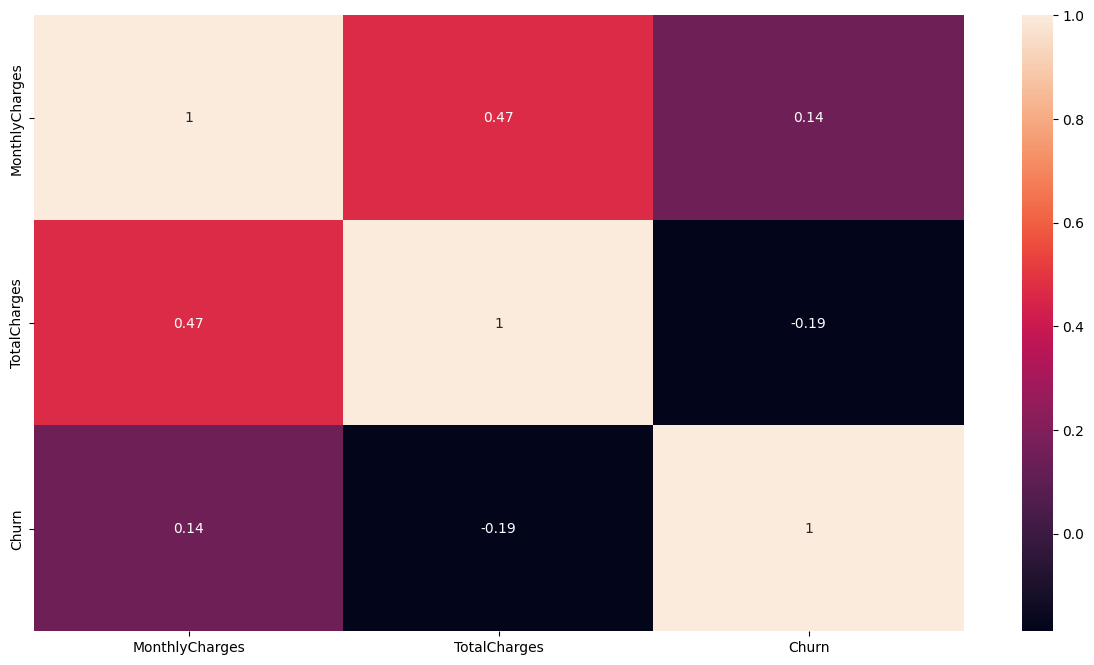

In [208]:
heat_num = ['MonthlyCharges','TotalCharges','Churn']
plt.figure(figsize=(15,8))
sns.heatmap(df_train[heat_num].corr(method='kendall'),annot=True)

### Pipeline

#### Pipeline Categorical

##### Pipeline Ordinal Encoder

In [209]:
cat_1_pipeline = Pipeline([
        ('ordinal_enc', OrdinalEncoder(categories=[['No','Yes'],['No','Yes'],['No phone service','No','Yes'],['No','DSL','Fiber optic'],['No internet service','No','Yes'],
                                                   ['No internet service','No','Yes'],['No internet service','No','Yes'],['No internet service','No','Yes'],['No internet service','No','Yes'],
                                                   ['No internet service','No','Yes'],['Month-to-month','One year','Two year'],['No','Yes']]))
    ])

cat_1_tr = cat_1_pipeline.fit(x_train[[ 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling']])
cat_1_tr

Pipeline(steps=[('ordinal_enc',
                 OrdinalEncoder(categories=[['No', 'Yes'], ['No', 'Yes'],
                                            ['No phone service', 'No', 'Yes'],
                                            ['No', 'DSL', 'Fiber optic'],
                                            ['No internet service', 'No',
                                             'Yes'],
                                            ['No internet service', 'No',
                                             'Yes'],
                                            ['No internet service', 'No',
                                             'Yes'],
                                            ['No internet service', 'No',
                                             'Yes'],
                                            ['No internet service', 'No',
                                             'Yes'],
                                            ['No internet service', 'No',
                                

##### Pipeline One Hot Encoder

In [210]:
cat_2_pipeline = Pipeline([
        ('ohe_enc', OneHotEncoder(sparse=False, handle_unknown='ignore'))
    ])

cat_2_tr = cat_2_pipeline.fit(x_train[['PaymentMethod']])
cat_2_tr

Pipeline(steps=[('ohe_enc',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In pipeline, it divides the encoder pipeline into two, Pipeline for Ordinal Encoder and One Hot Encoder.

#### Pipeline Numerical

In [211]:
num_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('imputer',SimpleImputer(strategy='median'))
    ])

num_tr = num_pipeline.fit(x_train[['MonthlyCharges','TotalCharges']])
num_tr

Pipeline(steps=[('scaler', StandardScaler()),
                ('imputer', SimpleImputer(strategy='median'))])

For numerical, the pipeline used to handle missing value using SimpleImputer and scaling using StandardScaler.

### Pipeline Preprocessing

#### Pipeline Unbalance

In [212]:
unbalance_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['MonthlyCharges','TotalCharges']),
        ("cat_ord", cat_1_pipeline, [ 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling']),
        ("cat_ohe", cat_2_pipeline, ['PaymentMethod']),
    ])

In [213]:
unbalance_pipeline.fit(x_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['MonthlyCharges', 'TotalCharges']),
                                ('cat_ord',
                                 Pipeline(steps=[('ordinal_enc',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No '
                                                                              'phone '
                                           

In [214]:
val_tr = unbalance_pipeline.transform(x_val)
val_tr

array([[ 1.11885378,  0.79569817,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-1.47088342, -0.90355827,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.33590789,  2.29461511,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.50899216, -0.83886805,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.3466158 , -0.46071294,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.18092564, -0.89181241,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [215]:
test_tr = unbalance_pipeline.transform(x_test)
test_tr

array([[-1.00198027, -1.00797325,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.13376383, -0.96796254,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-1.51396287, -0.99310396,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.16104282, -1.01008486,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.34673763,  1.20299797,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.33336059, -0.3627208 ,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [216]:
balance_pipeline = imbpipe([
        ("preprocessing", unbalance_pipeline),
        ("cat_ord", SMOTENC(categorical_features=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],sampling_strategy='minority',k_neighbors = 5,random_state=33)),
    ])

In [217]:
x_train_resampled, y_train_resampled = balance_pipeline.fit_resample(x_train,y_train)

because the data given isn't balanced, then I handled it to be balance by using pipeline SMOTENC method.

### Pipeline Tensorflow

In [218]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_resampled, y_train_resampled))

## Shuffle and slice train dataset.
train_dataset = train_dataset.shuffle(buffer_size=7043).batch(32)

val_dataset = tf.data.Dataset.from_tensor_slices((val_tr, y_val))
val_dataset = val_dataset.batch(32)

## Now we get a test dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((test_tr, y_test))
test_dataset = test_dataset.batch(32)

## vi. Model Definition


### Sequential

In [219]:
modelsq1 = tf.keras.models.Sequential()
modelsq1.add(tf.keras.layers.Dense(units=18, activation='relu', input_shape = (x_train_resampled.shape[1],)))
modelsq1.add(tf.keras.layers.Dense(units=39, activation='relu'))
modelsq1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
modelsq1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [220]:
modelsq2 = Sequential()
modelsq2 = tf.keras.models.Sequential()
modelsq2.add(tf.keras.layers.Dense(units=18, activation='relu', input_shape = (x_train_resampled.shape[1],), kernel_initializer='HeNormal',kernel_regularizer='l2'))
modelsq2.add(tf.keras.layers.BatchNormalization())
modelsq2.add(tf.keras.layers.Dense(units=39, activation='relu'))
modelsq2.add(tf.keras.layers.BatchNormalization())
modelsq2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
modelsq2.compile(optimizer = 'Adagrad', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Functional

In [221]:
input_lyr_f1 = tf.keras.layers.Input(shape=(x_train_resampled.shape[1],))
layers = tf.keras.layers.Dense(18, activation='relu',kernel_initializer='HeNormal',kernel_regularizer='l2')(input_lyr_f1)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(39, kernel_initializer='HeNormal',activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dropout(0.1)(layers)
output_lyr_f1 = tf.keras.layers.Dense(1, kernel_initializer='HeNormal',activation='sigmoid')(layers)

model_func1 = tf.keras.models.Model(inputs=input_lyr_f1,outputs = output_lyr_f1)
model_func1.compile(loss='binary_crossentropy',optimizer='Adamax',metrics=['accuracy'])

In [222]:
input_lyr_f2 = tf.keras.layers.Input(shape=(x_train_resampled.shape[1],))
layers = tf.keras.layers.Dense(18, activation='relu',kernel_initializer='HeNormal',kernel_regularizer='l2')(input_lyr_f2)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(9 , kernel_initializer='HeNormal',activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dropout(0.1)(layers)
output_lyr_f2 = tf.keras.layers.Dense(1, kernel_initializer='HeNormal',activation='sigmoid')(layers)

model_func2 = tf.keras.models.Model(inputs=input_lyr_f2,outputs = output_lyr_f2)
model_func2.compile(loss='binary_crossentropy',optimizer='Adamax',metrics=['accuracy'])


### Summary

#### Sequential Summary

In [223]:
modelsq1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                342       
                                                                 
 dense_1 (Dense)             (None, 39)                741       
                                                                 
 dense_2 (Dense)             (None, 1)                 40        
                                                                 
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________


In [224]:
modelsq2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 18)                342       
                                                                 
 batch_normalization (BatchN  (None, 18)               72        
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 39)                741       
                                                                 
 batch_normalization_1 (Batc  (None, 39)               156       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 1)                 40        
                                                                 
Total params: 1,351
Trainable params: 1,237
Non-traina

#### Functional Summary

In [225]:
model_func1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense_6 (Dense)             (None, 18)                342       
                                                                 
 batch_normalization_2 (Batc  (None, 18)               72        
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 39)                741       
                                                                 
 batch_normalization_3 (Batc  (None, 39)               156       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 39)                0     

In [226]:
model_func2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense_9 (Dense)             (None, 18)                342       
                                                                 
 batch_normalization_4 (Batc  (None, 18)               72        
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 9)                 171       
                                                                 
 batch_normalization_5 (Batc  (None, 9)                36        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 9)                 0   

## vii. Model Training

In [227]:
history_sq1 = modelsq1.fit(train_dataset, epochs=40, validation_data=val_dataset)

Epoch 1/40
207/207 [==============================] - 3s 9ms/step - loss: 0.5490 - accuracy: 0.7105 - val_loss: 0.5133 - val_accuracy: 0.7445
Epoch 2/40
207/207 [==============================] - 1s 6ms/step - loss: 0.4772 - accuracy: 0.7685 - val_loss: 0.5219 - val_accuracy: 0.7338
Epoch 3/40
207/207 [==============================] - 1s 6ms/step - loss: 0.4662 - accuracy: 0.7729 - val_loss: 0.4818 - val_accuracy: 0.7445
Epoch 4/40
207/207 [==============================] - 2s 9ms/step - loss: 0.4598 - accuracy: 0.7778 - val_loss: 0.4841 - val_accuracy: 0.7453
Epoch 5/40
207/207 [==============================] - 2s 8ms/step - loss: 0.4545 - accuracy: 0.7813 - val_loss: 0.4579 - val_accuracy: 0.7516
Epoch 6/40
207/207 [==============================] - 1s 7ms/step - loss: 0.4525 - accuracy: 0.7834 - val_loss: 0.4784 - val_accuracy: 0.7453
Epoch 7/40
207/207 [==============================] - 1s 7ms/step - loss: 0.4493 - accuracy: 0.7816 - val_loss: 0.4626 - val_accuracy: 0.7498
Epoch 

In [228]:
history_sq2 = modelsq2.fit(train_dataset, epochs=50, validation_data=val_dataset)

Epoch 1/50
207/207 [==============================] - 2s 4ms/step - loss: 1.0036 - accuracy: 0.6556 - val_loss: 0.9767 - val_accuracy: 0.6318
Epoch 2/50
207/207 [==============================] - 1s 3ms/step - loss: 0.9140 - accuracy: 0.7096 - val_loss: 0.9343 - val_accuracy: 0.6744
Epoch 3/50
207/207 [==============================] - 1s 3ms/step - loss: 0.8896 - accuracy: 0.7188 - val_loss: 0.9142 - val_accuracy: 0.7019
Epoch 4/50
207/207 [==============================] - 1s 3ms/step - loss: 0.8737 - accuracy: 0.7355 - val_loss: 0.9037 - val_accuracy: 0.7063
Epoch 5/50
207/207 [==============================] - 1s 3ms/step - loss: 0.8642 - accuracy: 0.7343 - val_loss: 0.8954 - val_accuracy: 0.7161
Epoch 6/50
207/207 [==============================] - 1s 3ms/step - loss: 0.8570 - accuracy: 0.7362 - val_loss: 0.8885 - val_accuracy: 0.7169
Epoch 7/50
207/207 [==============================] - 1s 3ms/step - loss: 0.8536 - accuracy: 0.7376 - val_loss: 0.8829 - val_accuracy: 0.7214
Epoch 

In [229]:
history_fc1 = model_func1.fit(train_dataset, epochs=40, validation_data=val_dataset)

Epoch 1/40
207/207 [==============================] - 2s 4ms/step - loss: 0.9599 - accuracy: 0.6925 - val_loss: 0.9334 - val_accuracy: 0.6957
Epoch 2/40
207/207 [==============================] - 1s 3ms/step - loss: 0.8631 - accuracy: 0.7337 - val_loss: 0.8325 - val_accuracy: 0.7285
Epoch 3/40
207/207 [==============================] - 1s 3ms/step - loss: 0.8168 - accuracy: 0.7489 - val_loss: 0.7957 - val_accuracy: 0.7356
Epoch 4/40
207/207 [==============================] - 1s 3ms/step - loss: 0.7763 - accuracy: 0.7601 - val_loss: 0.7533 - val_accuracy: 0.7480
Epoch 5/40
207/207 [==============================] - 1s 3ms/step - loss: 0.7482 - accuracy: 0.7644 - val_loss: 0.7366 - val_accuracy: 0.7462
Epoch 6/40
207/207 [==============================] - 1s 3ms/step - loss: 0.7245 - accuracy: 0.7651 - val_loss: 0.7143 - val_accuracy: 0.7489
Epoch 7/40
207/207 [==============================] - 1s 3ms/step - loss: 0.7058 - accuracy: 0.7660 - val_loss: 0.6989 - val_accuracy: 0.7489
Epoch 

In [230]:
history_fc2 = model_func2.fit(train_dataset, epochs=40, validation_data=val_dataset)

Epoch 1/40
207/207 [==============================] - 2s 4ms/step - loss: 1.0491 - accuracy: 0.6716 - val_loss: 1.0120 - val_accuracy: 0.7045
Epoch 2/40
207/207 [==============================] - 1s 3ms/step - loss: 0.9315 - accuracy: 0.7161 - val_loss: 0.8955 - val_accuracy: 0.7365
Epoch 3/40
207/207 [==============================] - 1s 3ms/step - loss: 0.8698 - accuracy: 0.7341 - val_loss: 0.8494 - val_accuracy: 0.7427
Epoch 4/40
207/207 [==============================] - 1s 3ms/step - loss: 0.8213 - accuracy: 0.7467 - val_loss: 0.8067 - val_accuracy: 0.7498
Epoch 5/40
207/207 [==============================] - 1s 3ms/step - loss: 0.7835 - accuracy: 0.7520 - val_loss: 0.7733 - val_accuracy: 0.7471
Epoch 6/40
207/207 [==============================] - 1s 3ms/step - loss: 0.7572 - accuracy: 0.7565 - val_loss: 0.7507 - val_accuracy: 0.7445
Epoch 7/40
207/207 [==============================] - 1s 3ms/step - loss: 0.7222 - accuracy: 0.7617 - val_loss: 0.7121 - val_accuracy: 0.7542
Epoch 

In [231]:
keras.backend.clear_session()

## viii. Model Evaluation

### Sequential Model Evaluation

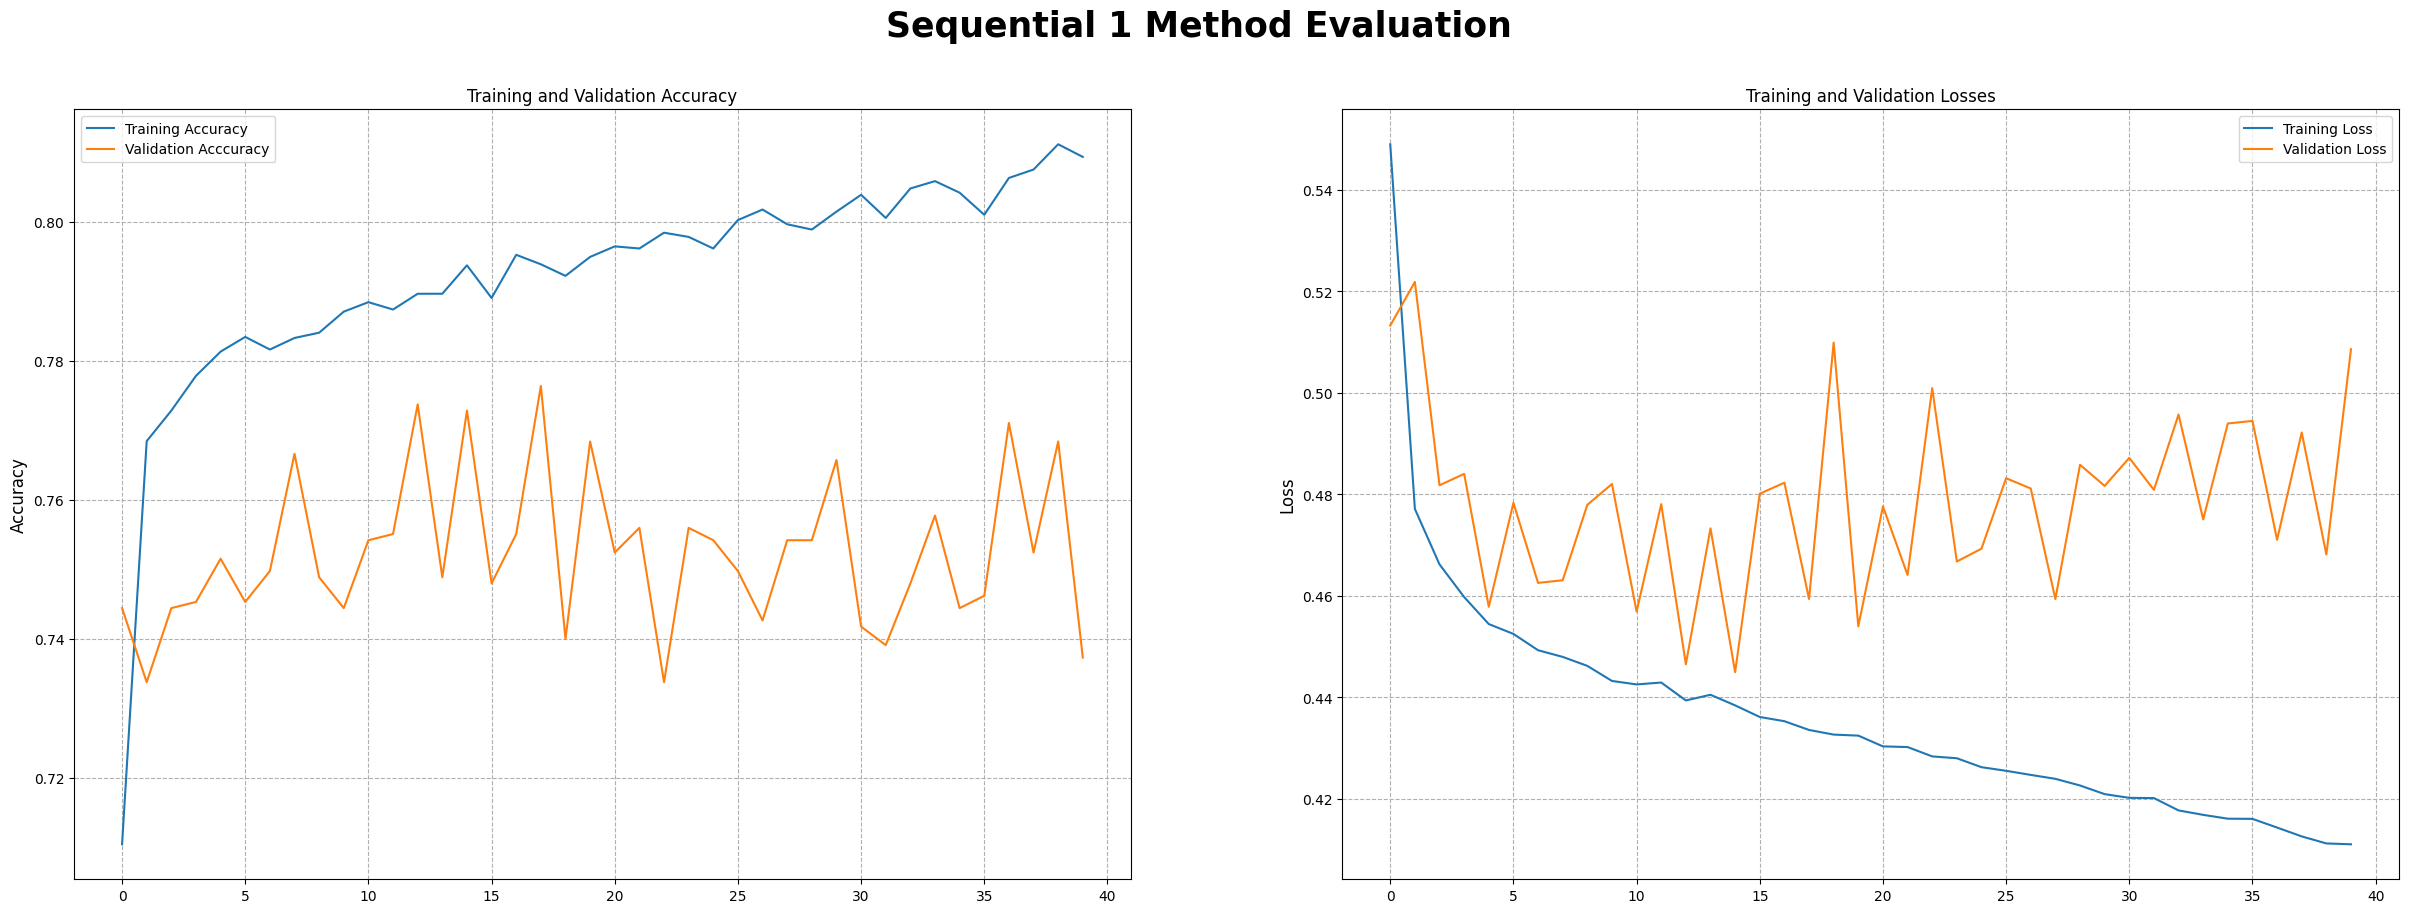

In [232]:
#Sequential 1 Model Evaluation

fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential 1 Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_sq1.history['accuracy'],label="Training Accuracy")
plt.plot(history_sq1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_sq1.history['loss'], label="Training Loss")
plt.plot(history_sq1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

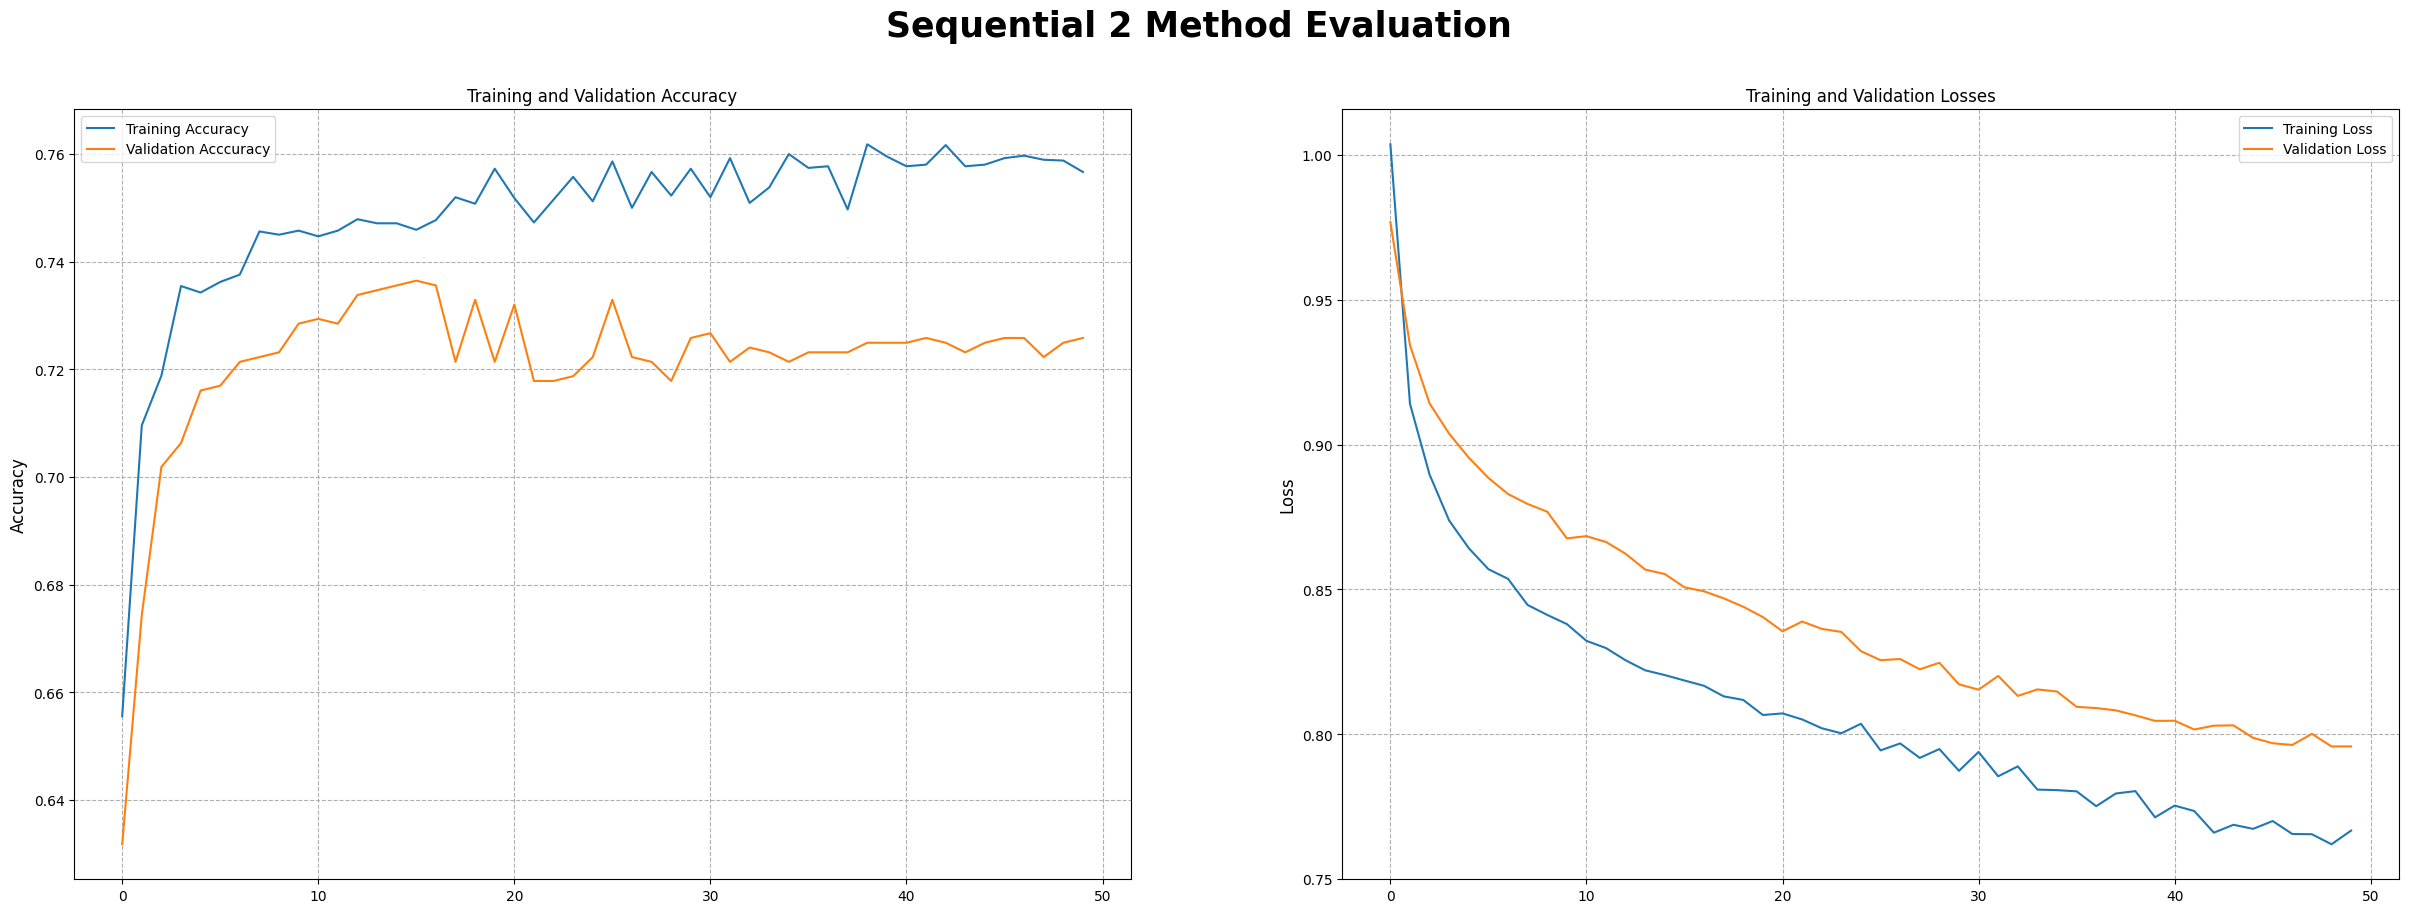

In [233]:
#Sequential 2 Model Evaluation

fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential 2 Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_sq2.history['accuracy'],label="Training Accuracy")
plt.plot(history_sq2.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_sq2.history['loss'], label="Training Loss")
plt.plot(history_sq2.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

After done analysis on Sequential 1 and 2, it is seen that there is improvement in Sequential 2, and is better compared to Sequential 1. Which I used different optimizer. In Sequential 1, I used Adam optimizer and 40 epoch, while in Sequential 2, I used Adagrad and 50 epoch. It means that Adagrad works better for this data as optimizer compared to adam.

### Functional Model Evaluation

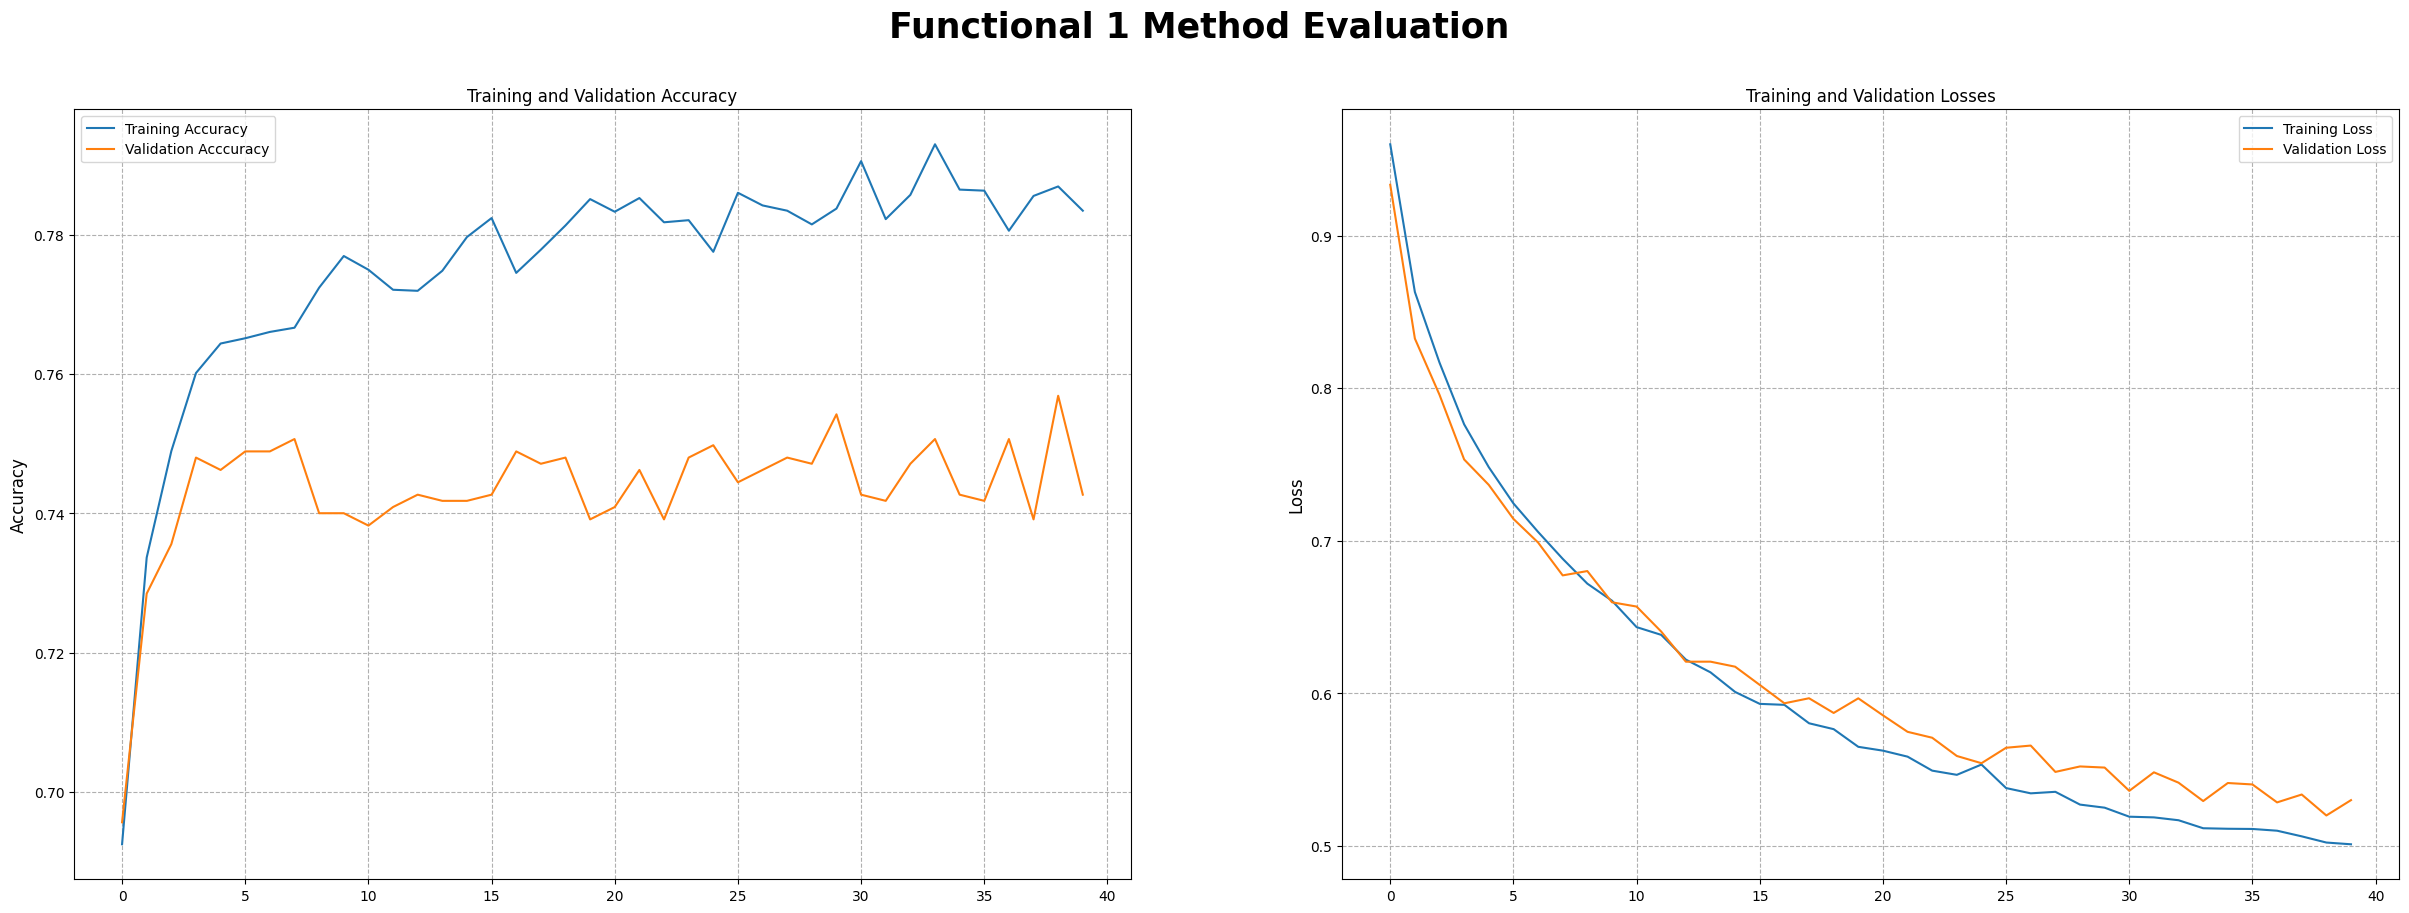

In [234]:
#Functional 1 Model Evaluation

fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional 1 Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_fc1.history['accuracy'],label="Training Accuracy")
plt.plot(history_fc1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_fc1.history['loss'], label="Training Loss")
plt.plot(history_fc1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

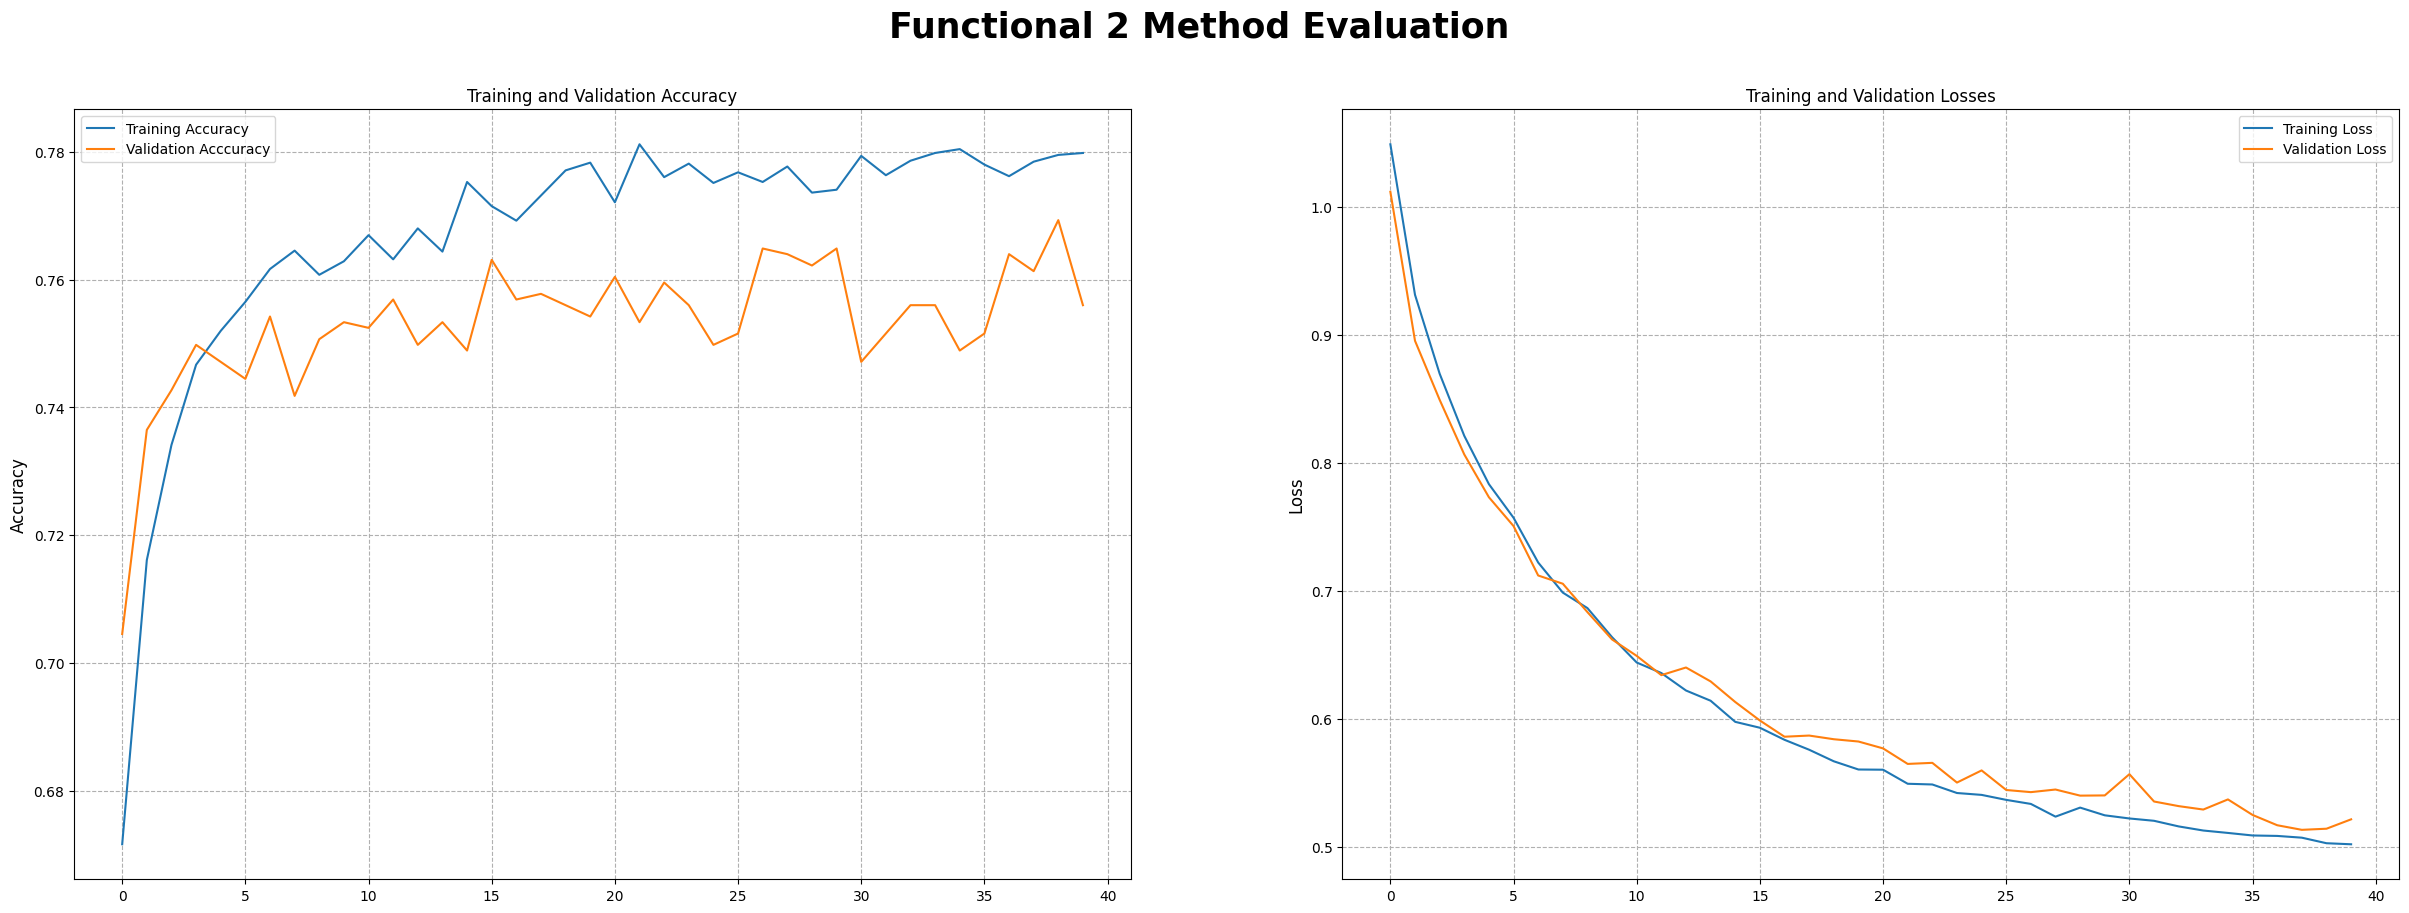

In [235]:
#Functional 2 Model Evaluation

fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional 2 Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_fc2.history['accuracy'],label="Training Accuracy")
plt.plot(history_fc2.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_fc2.history['loss'], label="Training Loss")
plt.plot(history_fc2.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

For Functional, it can be seen that there is improvement in functional 2 compared to functional 1. The difference is only from the Dense value. which Functional 1 used 39 as the dense and the functional 2 use 9 as dense.
It means, 9 as dense is better than 39.

In [236]:
results = model_func2.evaluate(test_dataset)
print(f'Testing Loss     : {results[0]:.4f}')
print(f'Testing Accuracy : {results[1]:.4f}')

45/45 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.7566
Testing Loss     : 0.5272
Testing Accuracy : 0.7566


45/45 [==============================] - 0s 2ms/step
[[783 252]
 [ 91 283]]


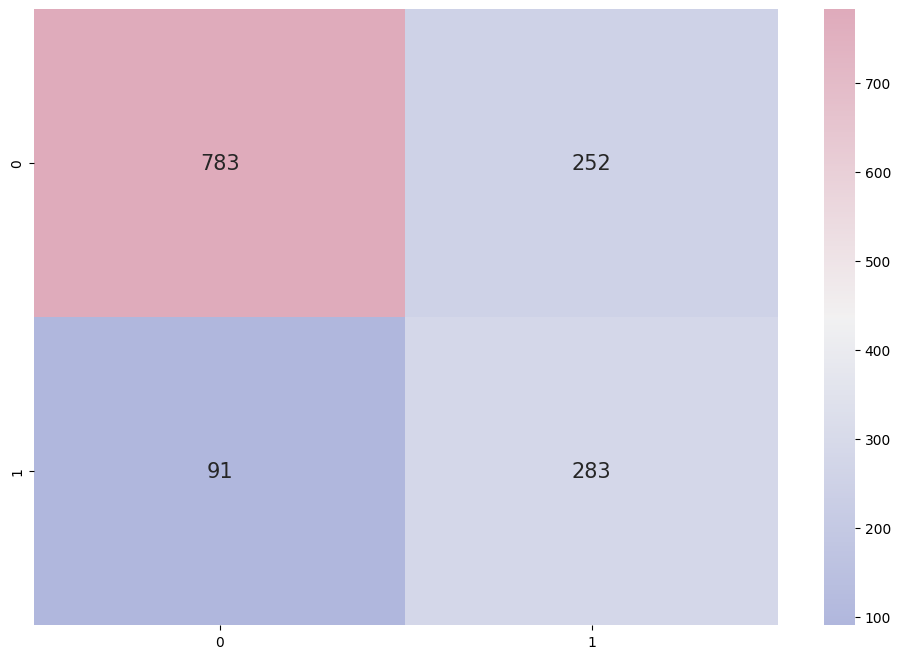

In [237]:
# predict probabilities
y_pred = model_func2.predict(test_tr)

# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred.round())
print(cf_matrix)
##persentase
# sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15});
sns.heatmap(cf_matrix, cmap = cmap1, annot = True, annot_kws = {'size':15}, fmt='g');

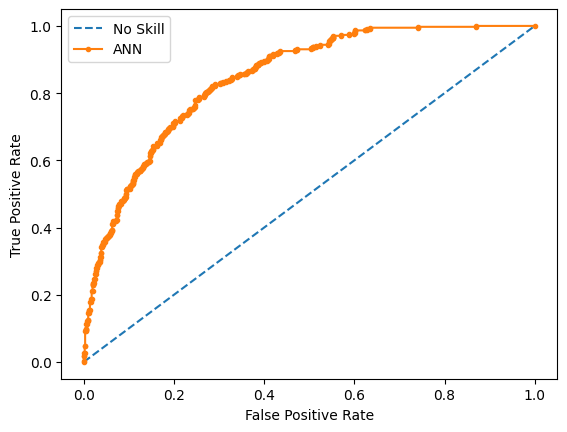

AUC score: 0.8454209615334934


In [238]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test,y_pred)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()
print(f'AUC score: {auc}')

based on the confusion matrix, I am focused on false negative value, with 91 value. And the AUC score is gotten 0.85 which means the model is good enough to perform in new data.

## ix. Model Saving

In [239]:
with open("pipeline.pkl", "wb") as f:
    pickle.dump(unbalance_pipeline, f)

In [240]:
model_func2.save('model.h5')

## x. Model Inference

In [241]:
import sklearn
print(tf.__version__)
print(sklearn.__version__)
print(np.__version__)

2.9.2
1.0.2
1.21.6


to proof that the model is good enough, then it's time to perform it to the new data which is data inference.

In [242]:
df_inf = {'gender':'Female',
 'SeniorCitizen':0,
 'Partner':'Yes',
 'Dependents':'Yes',
 'tenure':10,
 'PhoneService':'Yes',
 'MultipleLines':'No',
 'InternetService':'No',
 'OnlineSecurity':'No internet service',
 'OnlineBackup':'No internet service',
 'DeviceProtection':'No internet service',
 'TechSupport':'No internet service',
 'StreamingTV':'No internet service',
 'StreamingMovies':'No internet service',
 'Contract':'Month-to-month',
 'PaperlessBilling':'Yes',
 'PaymentMethod':'Mailed check',
 'MonthlyCharges':21.25,
 'TotalCharges':300.50}

df_inf = pd.DataFrame([df_inf])
df_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,Yes,10,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,21.25,300.5


In [243]:
df_inf=unbalance_pipeline.transform(df_inf)
df_inf

array([[-1.45762821, -0.89117453,  1.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ]])

In [244]:
with open("pipeline.pkl", "rb") as f:
    pipe_branch = pickle.load(f)

In [245]:
load_model_func = load_model('model.h5')

In [246]:
pred_inf =int(np.round(load_model_func.predict(df_inf)[0][0]))
pred_inf

1/1 [==============================] - 0s 103ms/step


0

## xi. Conclusion

1. Model used to perform is model functional that is improved.
2. Customer that has no dependents is more than the one with dependents. but from the proportion towrads Churn it's just the same which it doesn't affect that much on the Churn possibility.
3. Based on the customer's internet service used, it is seen that customer who use FIber Optic internet service has a big total of Churn compared to other internet service. And the most less Churn is the customer that has no internet service.
4. Customer that has no Online Security seems having Churn the most compared to others.
5. Customer with no Online Backup has Churn the most compared to others.
6. Based on the Device Protection, customer that has no Device Protection has Churn the most compared to others. Means Device Protection is important to prevent Churn.
7. Tech Support is also important to prevent Churn because it seems like customer that has no Tech Support has Churn the most, compared to others.
8. From the results above, It is also seen that Adagrad is a better optimizer compared to adam. Which shown from sequential 2 that has improvement after using Adagrad with 50 epoch compared to sequential 1 that is using adam with 40 epoch.
9. For the functional model, lower dense give better result. Which shown from functional 1 using 39 dense and functional 2 is using 9 as dense and is better compared to functional 1.
10. From the analysis, it is seen that functional 2 works the best, which shown that the AUC score is 0.85, means the model can be performed well in new data or data inference.
